<h1><p style= 'text-align:center;'>Time Series Modeling & Model Diagnostics (ARIMA & SARIMA)</p></h1>


<br>

<h2>ARMA Models</h2>

<h3>Train-Test split</h3>     
<br>

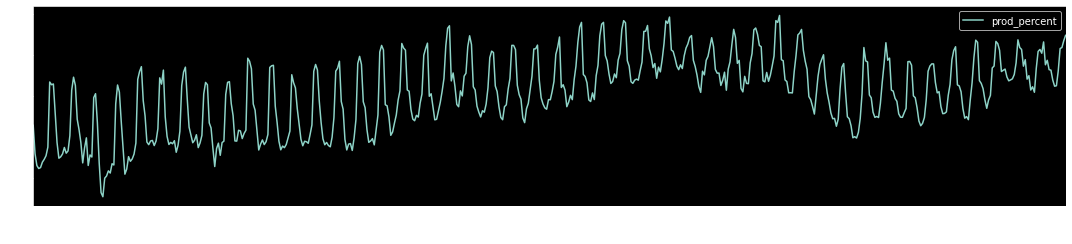

In [854]:
candyPr_df = pd.read_csv( 'datasets/candy_production.csv', parse_dates= True, index_col= 'date' )

candyPr_df.columns = ['prod_percent']

candyPr_df.plot( figsize= (15,3.5) ); plt.tight_layout()

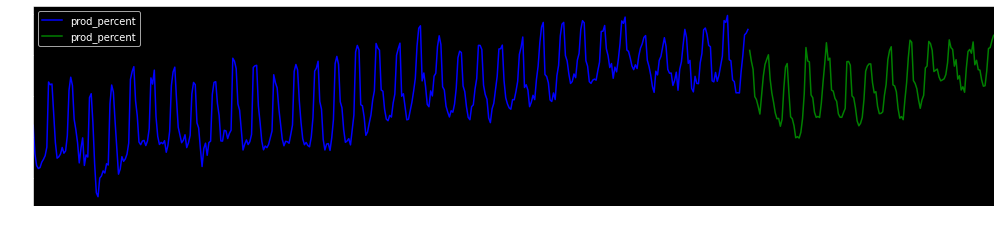

In [855]:
train_end_dt = datetime.datetime( 2006,12,31 )

candyPr_Train_df = candyPr_df[ : train_end_dt ]
candyPr_Test_df = candyPr_df[ train_end_dt + timedelta(days=1) : ]

fg,ax = plt.subplots( figsize= (14,3.5) )
candyPr_Train_df.plot( color= 'blue', ax= ax );   candyPr_Test_df.plot( color= 'green', ax= ax )
plt.tight_layout(); plt.show()

<br>
<h3>Stationarity & transforming TimeSeries into Non-Stationarity</h3>     

In [6]:
amz_df = pd.read_csv( 'datasets/amazon_close.csv', parse_dates= True, index_col= 0 )
earthqk_df = pd.read_csv( 'datasets/earthquakes.csv', parse_dates= True, index_col= 0 )
city_df = pd.read_csv( 'datasets/city_pop.csv', parse_dates= True, index_col= 0 )
candyPr_df
co2_df = pd.read_csv( 'datasets/co2.csv', parse_dates= True, index_col= 0 )
mlk_df = pd.read_csv( 'datasets/milk_production.csv', parse_dates= True, index_col= 0 )


# plot prep
dataToPlot_ls = [ amz_df, earthqk_df.earthquakes_per_year, city_df, candyPr_df, co2_df, mlk_df ]
lbl_ls = [ 'Amazon Stock price', 'Earthquake frequency/yr', 'City population','Candy production %',
           'CO2 atmospheric conc.', 'Milk Production' ]
title_ls =   [ '➚ Trend', '⇝ Stationarity', '➚ Trend', '↺ Seasonal & ↯Trend' , '↺ Seasonal & ➚ Trend', '↺ Seasonal & ➚ Trend' ]

lbl_title = list( zip(lbl_ls,title_ls) ) 

row_num = len( dataToPlot_ls )

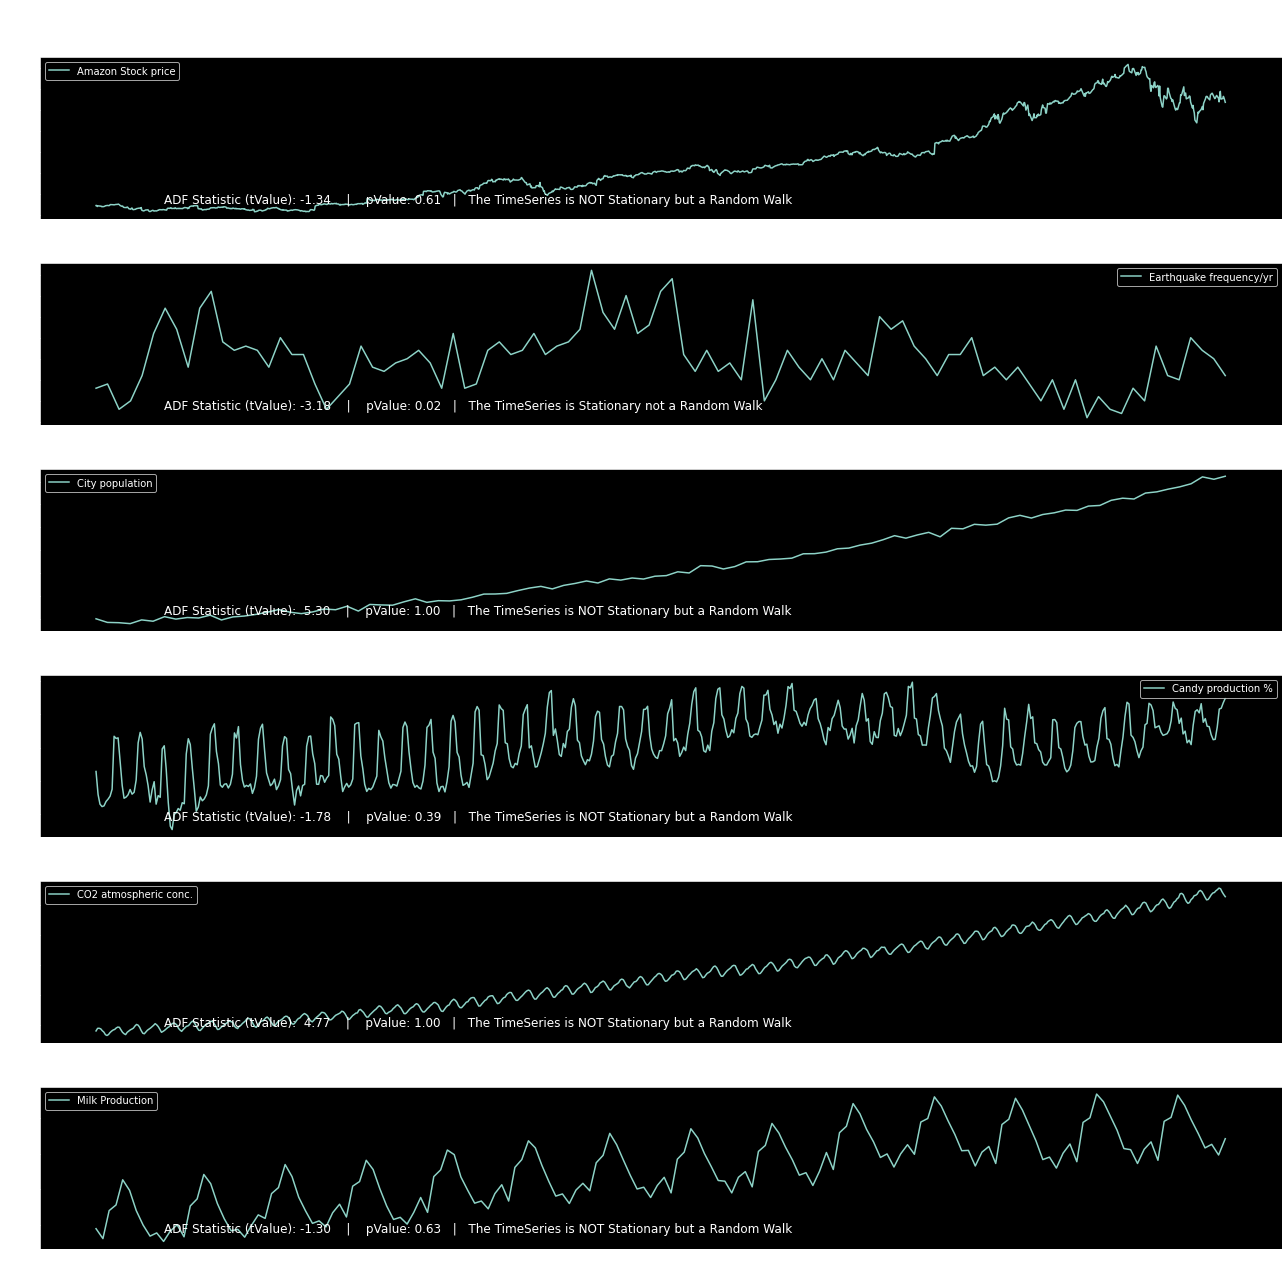

In [7]:
# plot

fg,ax = plt.subplots( nrows= row_num, ncols= 1, figsize= (18,3*row_num) )

for idx,(e_ax,e_data,e_title,e_lbl) in enumerate(  zip(ax.flatten(),dataToPlot_ls,title_ls,lbl_ls)  ):
    e_ax.plot( e_data, label= e_lbl )
    
    e_ax.set_title( e_title ); e_ax.legend( loc= 'best' )
    e_ax.text( x= 0.1, y =0.1, s= adfuller_test_str( e_data ), color= 'white', size= 12,
                   transform = e_ax.transAxes   )
    
fg.suptitle( 'Various TimeSeries plot with of different nature\n', fontsize= 17 );
plt.tight_layout();
plt.show()

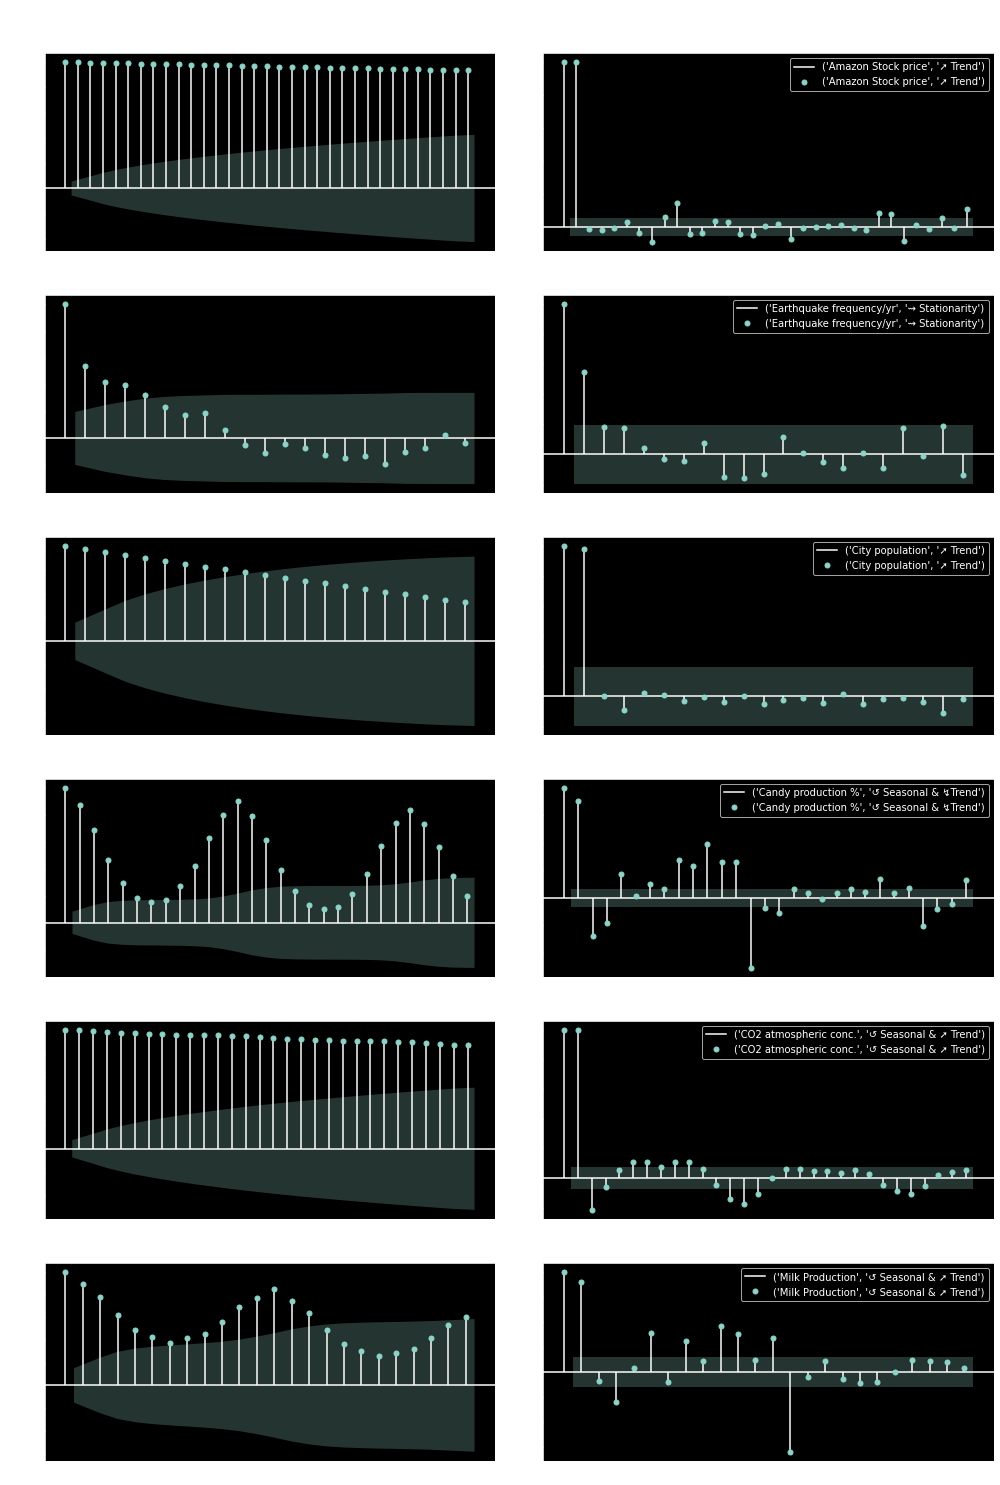

In [8]:
# ACF & PACF plots

fg,ax = plt.subplots( nrows= row_num, ncols= 2, figsize= (14,3.5*row_num) )

data_idx = plt_idx = 0

for _ in range(  len( ax.flatten() )//2  )  :
    
    plot_acf(  dataToPlot_ls[data_idx], ax= ax.flatten()[plt_idx]  );
    data_idx += 0;    plt_idx += 1    
    
    plot_pacf(  dataToPlot_ls[data_idx], ax= ax.flatten()[plt_idx], label= lbl_title[data_idx]  );
    ax.flatten()[plt_idx].legend()  
    data_idx += 1;    plt_idx += 1

    
fg.suptitle( 'ACF & PACF\n', fontsize= 17 );
plt.tight_layout(); plt.show()

<br>

#### Tranform the data to remove Stationarity

In [9]:
amz_trnsfm_Diff_df = amz_df.diff().dropna()                             # <-- 1 unit diff 
amz_trnsfm_LogDiff_df = np.log10(amz_df).diff().dropna()                # <-- log10 & 1 unit diff 
earthqk_trnsfm_df = earthqk_df.diff().dropna()                          # <-- already stnr
city_trnsfm_df = city_df.diff().dropna()                                # <-- 1 unit diff 
candyPr_trnsfm_df = candyPr_df.diff( periods= 12 ).dropna()             # <-- seasonal diff 
co2_trnsfm_df = co2_df.diff(  periods= 12 ).dropna()                    # <-- seasonal diff 
mlk_trnsfm_df = mlk_df.diff( periods= 12 ).diff().dropna()              # <-- seasonal diff & then 1 unit diff 

# plot prep
dataToPlot_ls = [ amz_trnsfm_Diff_df, amz_trnsfm_LogDiff_df, earthqk_trnsfm_df.earthquakes_per_year,
                  city_trnsfm_df, candyPr_trnsfm_df, co2_trnsfm_df, mlk_trnsfm_df               ]

lbl_ls = [ 'Amazon Stock - 1 unit diff', 'Amazon Stock - log10 & 1 unit diff',
           'Earthquake freq/yr', 'City pop - 1 unit diff', 'Candy prod% - season diff ' ,'CO2 - season diff',
           'Milk Prod - season diff & 1 unit diff' ]
title_ls =   [ '➚ Trend', '➚ Trend', '⇝ Stationarity', '➚ Trend', '↺ Seasonal & ↯Trend' , '↺ Seasonal & ➚ Trend',
               '↺ Seasonal & ➚ Trend' ]

lbl_title = list( zip(lbl_ls,title_ls) ) 

row_num = len( dataToPlot_ls )

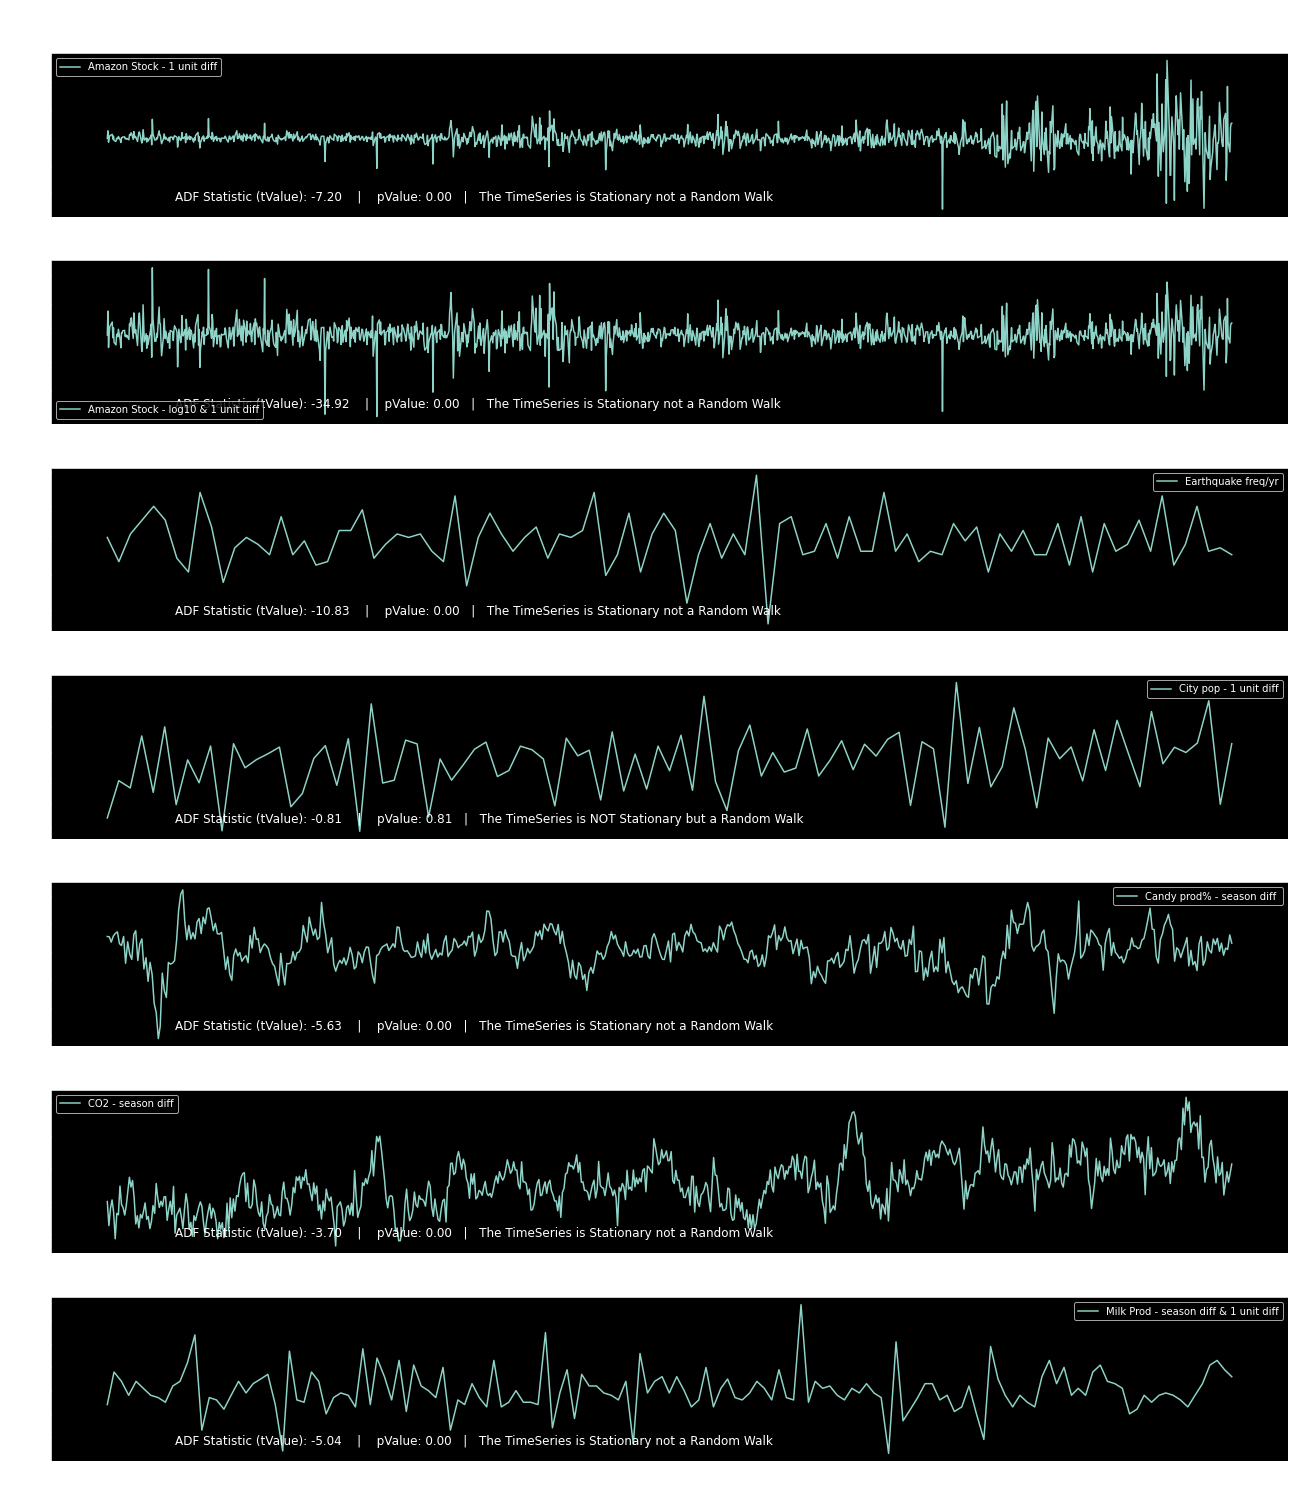

In [10]:
# plot

fg,ax = plt.subplots( nrows= row_num, ncols= 1, figsize= (18,3*row_num) )

for idx,(e_ax,e_data,e_title,e_lbl) in enumerate(  zip(ax.flatten(),dataToPlot_ls,title_ls,lbl_ls)  ):
    e_ax.plot( e_data, label= e_lbl )
    
    e_ax.set_title( e_title ); e_ax.legend( loc= 'best' )
    e_ax.text( x= 0.1, y =0.1, s= adfuller_test_str( e_data ), color= 'white', size= 12,
                   transform = e_ax.transAxes   )
    
fg.suptitle( 'TimeSeries plots of Transformed data\n', fontsize= 17 );
plt.tight_layout();
plt.show()

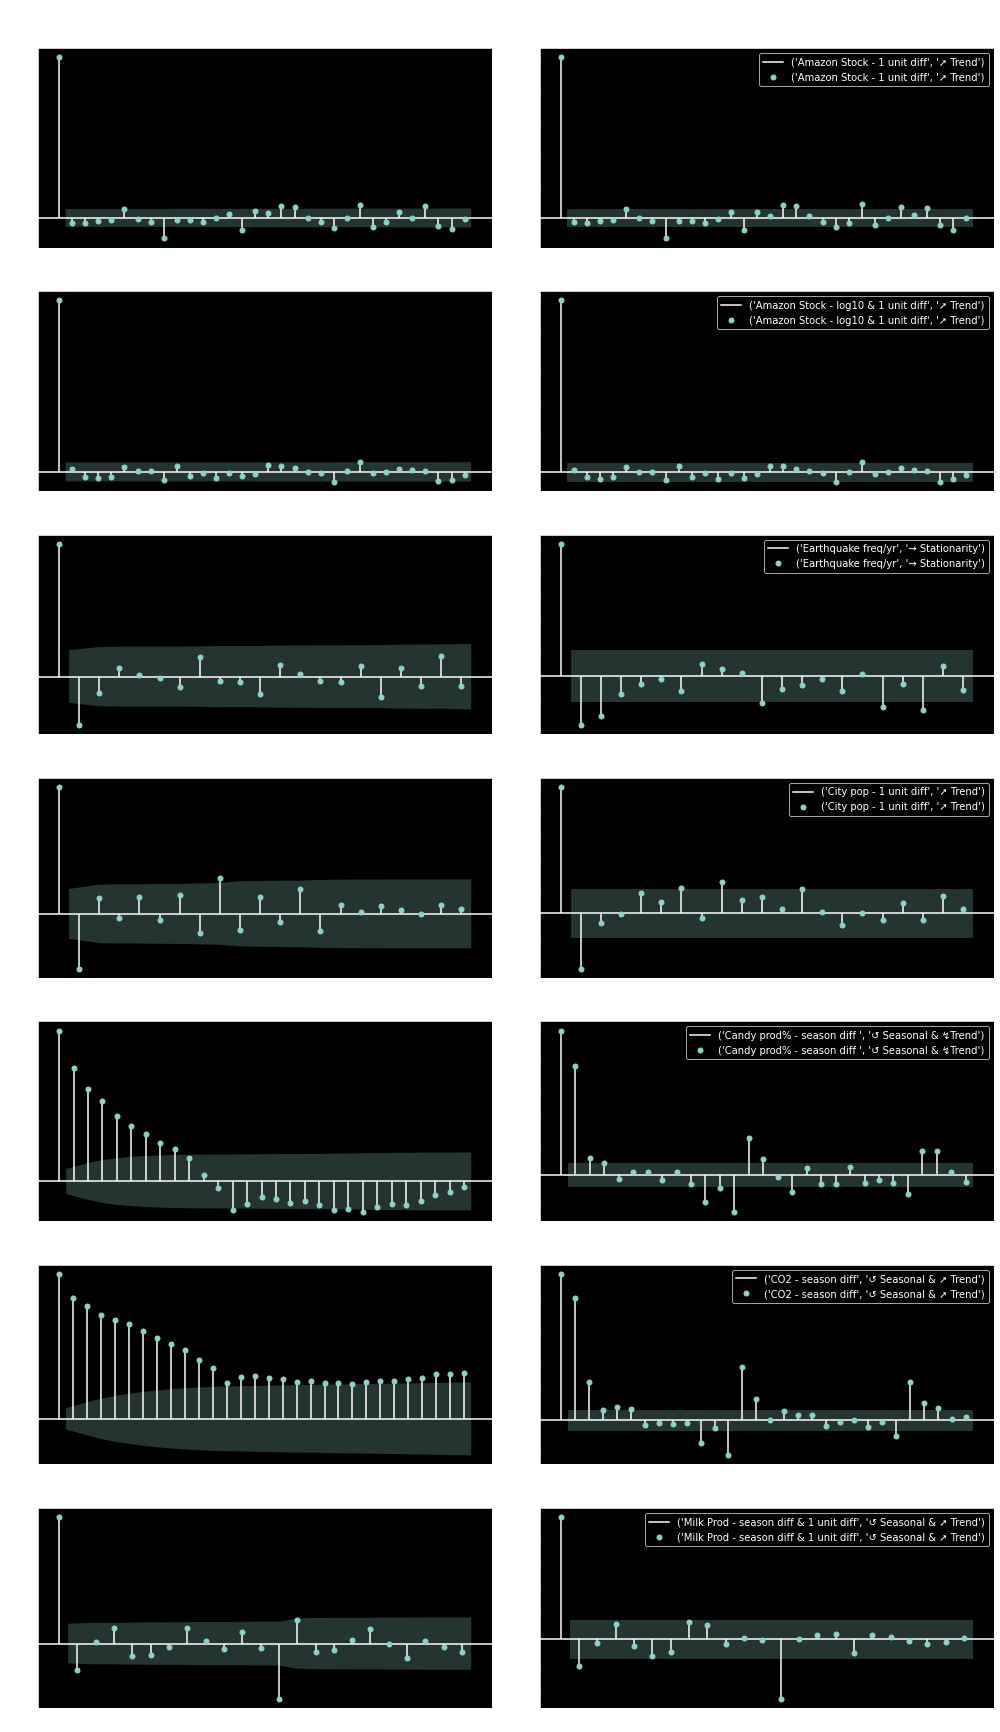

In [11]:
# ACF & PACF plots

fg,ax = plt.subplots( nrows= row_num, ncols= 2, figsize= (14,3.5*row_num) )

data_idx = plt_idx = 0

for _ in range(  len( ax.flatten() )//2  )  :
    
    plot_acf(  dataToPlot_ls[data_idx], ax= ax.flatten()[plt_idx]  );
    data_idx += 0;    plt_idx += 1    
    
    plot_pacf(  dataToPlot_ls[data_idx], ax= ax.flatten()[plt_idx], label= lbl_title[data_idx]  );
    ax.flatten()[plt_idx].legend()  
    data_idx += 1;    plt_idx += 1
    
fg.suptitle( 'ACF & PACF of transformed data\n', fontsize= 17 );
plt.tight_layout(); plt.show()

<h4>            
    
    There should be no clear correlation value in the ACF & PACF except the negative lag 1 autocorrelation. But there are some correlation       spikes (beyond CI) which means that the data after tranformation is not purely Stationary (except Amazon stock data).
</h4>
<br>

#### A non conventional transform func `log-return`

#### log_return$(y_t)$ &emsp; = &emsp; $ln(\frac{y_t}{y_{t-1}})$

In [12]:
amz_trnsfm_LnRetrn_df = np.log( amz_df/amz_df.shift(periods=1) ).dropna()

adfuller_test_str(amz_trnsfm_LnRetrn_df)

'ADF Statistic (tValue): -34.92    |    pValue: 0.00   |   The TimeSeries is Stationary not a Random Walk'

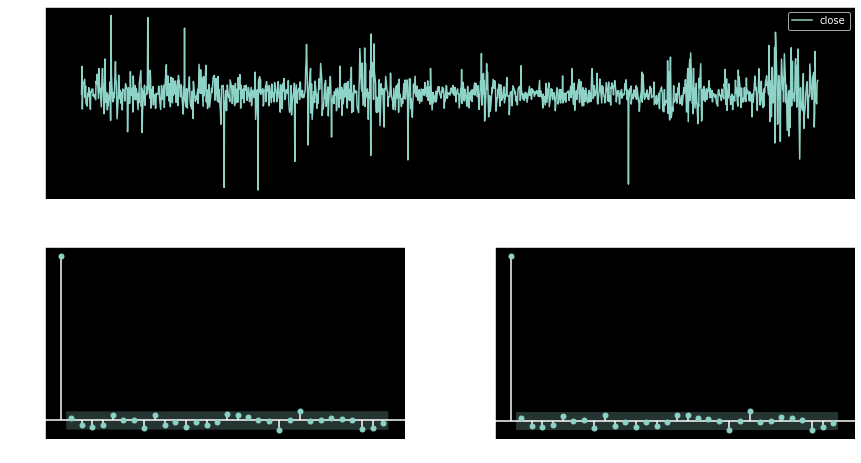

In [13]:
fg = plt.figure()
gs = GridSpec( 2,2, figure= fg, top= 1.7, right= 2, hspace= 0.25, wspace= 0.25 )

ax1 = fg.add_subplot( gs[0,:] )
ax2a = fg.add_subplot( gs[1,0] ); ax2b = fg.add_subplot( gs[1,1] )

amz_trnsfm_LnRetrn_df.plot( ax= ax1 )
plot_acf( amz_trnsfm_LnRetrn_df, ax= ax2a ); plot_pacf( amz_trnsfm_LnRetrn_df, ax= ax2b )

plt.show()

Notice that both the differenced and the log-return transformed time series have a small p-value, but the log transformed time series has a much more -ve t-test statistic. This means the log-return tranformation is better for this timeSeries.

<br>

### `AR`, `MA` and `ARMA` models

#### Generate `ARMA` simulated data

In [113]:
from statsmodels.tsa import arima_process
from statsmodels.tsa import arima_model

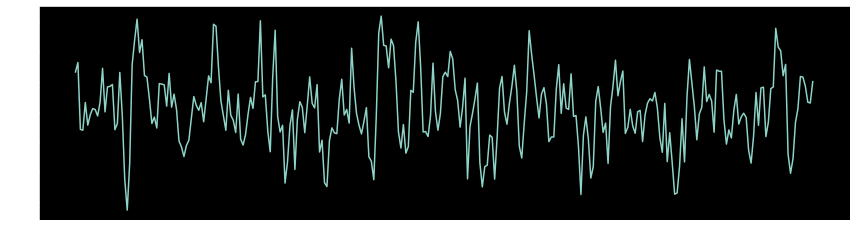

In [150]:
np.random.seed(10)

phi_order = [ 0.5 ];       theta_order = [ 0.2 ]

phi_order = list(map( lambda e: e * -1, phi_order ) )

ar_phi, ma_theta = [1], [1]
ar_phi.extend( phi_order ); ma_theta.extend( theta_order )

yt = arima_process.arma_generate_sample(  ar= ar_phi, ma= ma_theta,
                                          nsample= 300, scale= 0.5  )
fg,ax = plt.subplots( figsize= (12,3.5) )
ax.plot( yt )
plt.tight_layout()

Simulating ARMA(1,2) process data for the equation:


&emsp; &emsp; $y_t$ &nbsp;  = &nbsp;  - &thinsp; 0.2 $y_{t-1}$ &nbsp;  + &thinsp; 0.95 $y_{t-2}$ &nbsp; + &thinsp; 0.15 $y_{t-3}$ &nbsp; + &nbsp;  0.3 $𝜀_{t-1}$ &nbsp;  - &nbsp;  0.4 $𝜀_{t-2}$ &nbsp;  + &nbsp;  $𝜀_{t}$

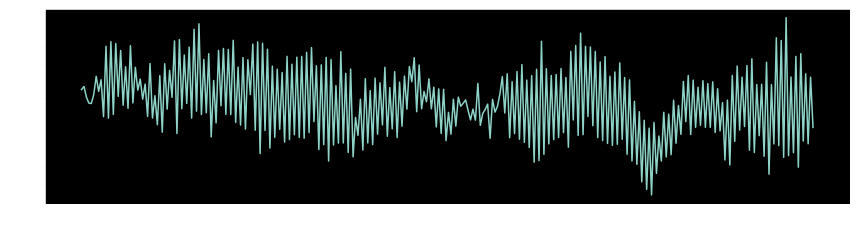

In [151]:
# np.random.seed(10)

phi_order = [ -0.2,0.95,0.15 ];       theta_order = [ 0.3,-0.4 ]

phi_order = list(map( lambda e: e * -1, phi_order ) )

ar_phi, ma_theta = [1], [1]
ar_phi.extend( phi_order ); ma_theta.extend( theta_order )

yt = arima_process.arma_generate_sample(  ar= ar_phi, ma= ma_theta,
                                          nsample= 300, scale= 0.5  )

fg,ax = plt.subplots( figsize= (12,3.5) )
ax.plot( yt )
plt.ylabel(r'$y_t$'); plt.xlabel(r'$t$'); plt.tight_layout()

#### &emsp; &emsp; $y_t$ &nbsp;  = &nbsp;  - &thinsp; 0.2 $y_{t-1}$ &nbsp;  - &thinsp; 0.85 $y_{t-2}$ &nbsp; + &thinsp; 0.15 $y_{t-3}$ &nbsp; + &nbsp;  0.3 $𝜀_{t-1}$ &nbsp;  - &nbsp;  0.4 $𝜀_{t-2}$ &nbsp;  + &nbsp;  $𝜀_{t}$

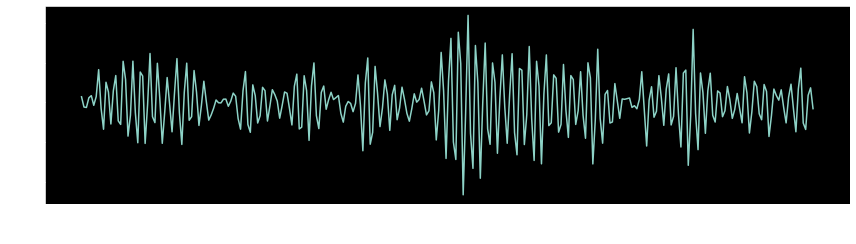

In [152]:
# np.random.seed(10)

phi_order = [ -0.2,-0.85,0.15 ];       theta_order = [ 0.3,-0.4 ]

phi_order = list(map( lambda e: e * -1, phi_order ) )

ar_phi, ma_theta = [1], [1]
ar_phi.extend( phi_order ); ma_theta.extend( theta_order )

yt = arima_process.arma_generate_sample(  ar= ar_phi, ma= ma_theta,
                                          nsample= 300, scale= 0.5  )

fg,ax = plt.subplots( figsize= (12,3.5) )
ax.plot( yt )
plt.ylabel(r'$y_t$'); plt.xlabel(r'$t$'); plt.tight_layout()

<br>

## Fitting `AR`, `MA`, `ARMA` & `ARMAX` model
<br>

In [115]:
from statsmodels.tsa.arima_model import ARMA, ARIMA

#### simulating `AR(2)` model data

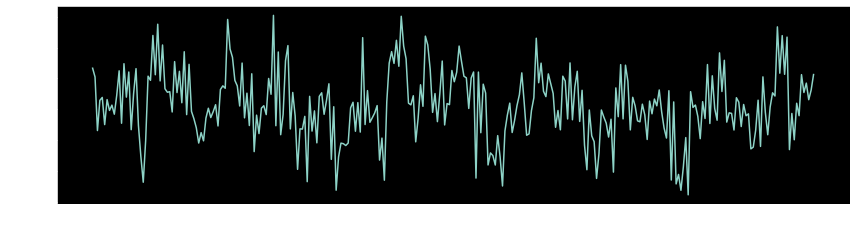

In [156]:
np.random.seed(10)

phi_order = [ 0.25, 0.45 ];       theta_order = [ 0 ]
phi_order = list(map( lambda e: e * -1, phi_order ) )
ar_phi, ma_theta = [1], [1]
ar_phi.extend( phi_order ); ma_theta.extend( theta_order )

yt_simu = arima_process.arma_generate_sample(  ar= ar_phi, ma= ma_theta,
                                               nsample= 300, scale= 0.5  )

fg,ax = plt.subplots( figsize= (12,3.5) )
ax.plot( yt_simu )
plt.ylabel(r'$y_t - simulated$'); plt.xlabel(r'$t$'); plt.tight_layout()

#### fitting the model with the simulated `AR(2)` data

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  300
Model:                     ARMA(2, 0)   Log Likelihood                -203.196
Method:                       css-mle   S.D. of innovations              0.476
Date:                Thu, 17 Jun 2021   AIC                            414.393
Time:                        03:41:49   BIC                            429.208
Sample:                             0   HQIC                           420.322
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0715      0.071      1.010      0.313      -0.067       0.210
ar.L1.y        0.2193      0.053      4.146      0.000       0.116       0.323
ar.L2.y        0.3957      0.053      7.474      0.0

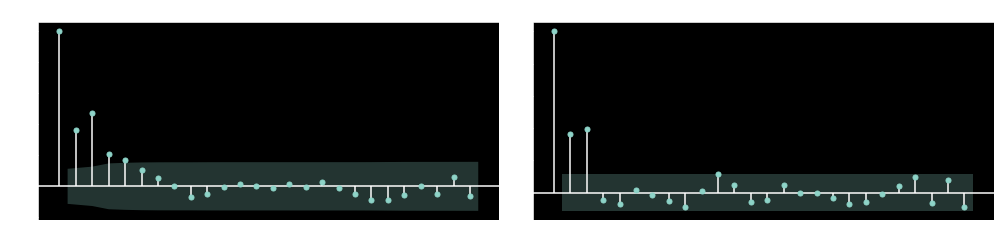

In [164]:
armaModel_fit = arima_model.ARMA( yt_simu, order= (2,0) ).fit()

print( armaModel_fit.summary() )

fg,(ax1,ax2) = plt.subplots( 1,2, figsize= (14,3.5) )
plot_acf( yt_simu, ax= ax1 );         plot_pacf( yt_simu, ax= ax2 )
plt.tight_layout(); plt.show()

#### fitting the model using `MA(2)` 

In [165]:
armaModel_fit = arima_model.ARMA( yt_simu, order= (0,2) ).fit()

print( armaModel_fit.summary() )

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  300
Model:                     ARMA(0, 2)   Log Likelihood                -207.812
Method:                       css-mle   S.D. of innovations              0.483
Date:                Thu, 17 Jun 2021   AIC                            423.624
Time:                        03:43:06   BIC                            438.439
Sample:                             0   HQIC                           429.553
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0668      0.045      1.474      0.140      -0.022       0.156
ma.L1.y        0.1927      0.056      3.422      0.001       0.082       0.303
ma.L2.y        0.4349      0.050      8.718      0.0

#### Fitting an `ARMA` model

Let's fit an ARMA model to the earthquakes dataset. The earthquakes dataset is stationary so no need to transform it for Stationarity. It comes ready for modeling straight out the ground.

In [172]:
earthqk_df['earthquakes_per_year']

date
1900-01-01    13.0
1901-01-01    14.0
              ... 
1997-01-01    20.0
1998-01-01    16.0
Name: earthquakes_per_year, Length: 99, dtype: float64

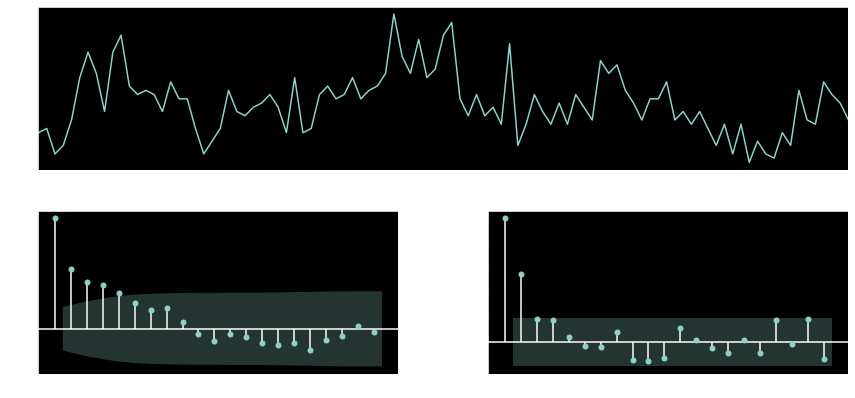

In [177]:
fg = plt.figure()
gs = GridSpec( 2,2, figure= fg, top= 1.4, right= 2, hspace= 0.25, wspace= 0.25 )

ax1 = fg.add_subplot( gs[0,:] )
ax2a = fg.add_subplot( gs[1,0] );    ax2b = fg.add_subplot( gs[1,1] )

earthqk_df['earthquakes_per_year'].plot( ax= ax1 )
plot_acf( earthqk_df['earthquakes_per_year'], ax= ax2a );     plot_pacf( earthqk_df['earthquakes_per_year'], ax= ax2b )
plt.show()

Based on ACF & PACF, we can start with `ARMA(1,3)` model

In [180]:
armaModel_fit = ARMA( earthqk_df['earthquakes_per_year'], order=(3,1) ).fit()
print( armaModel_fit.summary() )

                               ARMA Model Results                               
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                       ARMA(3, 1)   Log Likelihood                -315.673
Method:                         css-mle   S.D. of innovations              5.853
Date:                  Thu, 17 Jun 2021   AIC                            643.345
Time:                          00:04:44   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.6452      1.929     10.183      0.000      15.864      23.426
ar.L1.earthquakes_per_year     0.5794      0.416      1.393      0.

#### Fitting an `ARMAX` model

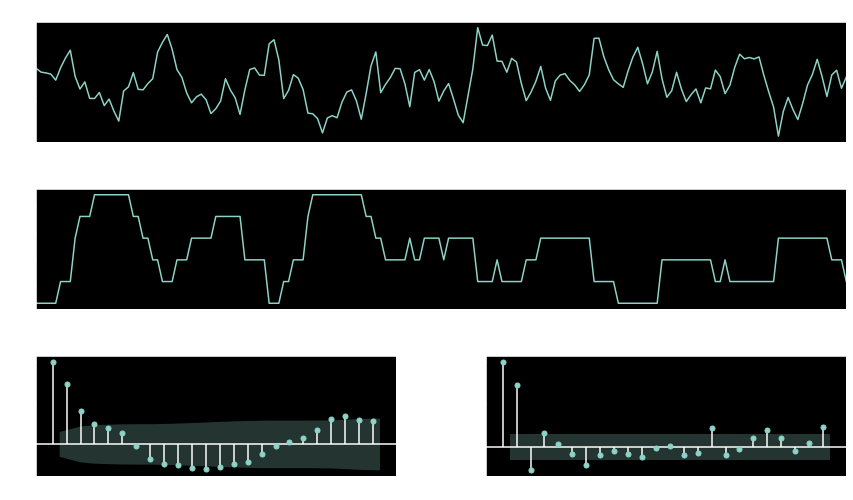

In [8]:
hosp_df = pd.read_csv( 'datasets/hospital_wait_nurse.csv', parse_dates= True, index_col= 0 )

fg = plt.figure()
gs = GridSpec( 3,2, figure= fg, top= 1.7, right= 2, hspace= 0.4, wspace= 0.25 )

ax1 = fg.add_subplot( gs[0,:] )
ax2 = fg.add_subplot( gs[1,:] )
ax3a = fg.add_subplot( gs[2,0] );     ax3b = fg.add_subplot( gs[2,1] )

title_ls = [ 'Wait-time TimeSeries', 'Nurse Count TimeSeries (Exogenous variable)',
             'AutoCorrelation of Wait-time', 'Partial AutoCorr of Wait-time'  ]
ax_ls = [ ax1, ax2, ax3a, ax3b ]

hosp_df['wait_times_hrs'].plot( ax= ax1 )
hosp_df['nurse_count'].plot( ax= ax2 )
plot_acf( hosp_df['wait_times_hrs'], ax= ax3a ); plot_pacf( hosp_df['wait_times_hrs'], ax= ax3b )

[ e_ax.set_title( e_title ) for e_ax,e_title in zip(ax_ls,title_ls) ];

plt.show()

#### `ARIMAX` model fit

In [25]:
warnings.filterwarnings( action= 'ignore' )

armaModel_fit = ARIMA( endog= hosp_df['wait_times_hrs'], exog= hosp_df['nurse_count'], order= (2,0,1),
                       freq= pd.infer_freq(hosp_df.index) ).fit()

print( armaModel_fit.summary() )

                               SARIMAX Results                                
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -11.834
Date:                Thu, 17 Jun 2021   AIC                             35.667
Time:                        18:10:58   BIC                             54.411
Sample:                    03-04-2019   HQIC                            43.275
                         - 03-10-2019                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1001      0.086     24.375      0.000       1.931       2.269
nurse_count    -0.1171      0.012     -9.562      0.000      -0.141      -0.093
ar.L1           0.5693      0.169      3.365    

In [26]:
warnings.filterwarnings( action= 'ignore' )

armaModel_fit = ARIMA( endog= hosp_df['wait_times_hrs'], exog= hosp_df['nurse_count'], order= (2,0,2),
                       freq= pd.infer_freq(hosp_df.index) ).fit()

print( armaModel_fit.summary() )

                               SARIMAX Results                                
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -11.555
Date:                Thu, 17 Jun 2021   AIC                             37.111
Time:                        18:11:04   BIC                             58.978
Sample:                    03-04-2019   HQIC                            45.986
                         - 03-10-2019                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1009      0.086     24.396      0.000       1.932       2.270
nurse_count    -0.1172      0.012     -9.427      0.000      -0.142      -0.093
ar.L1           0.3060      0.674      0.454    

In [34]:
warnings.filterwarnings( action= 'ignore' )

armaModel_fit = ARIMA( endog= hosp_df['wait_times_hrs'], exog= hosp_df['nurse_count'], order= (1,0,1),
                       freq= pd.infer_freq(hosp_df.index) ).fit()

print( armaModel_fit.summary() )

                               SARIMAX Results                                
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -12.487
Date:                Thu, 17 Jun 2021   AIC                             34.975
Time:                        18:19:16   BIC                             50.595
Sample:                    03-04-2019   HQIC                            41.314
                         - 03-10-2019                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1107      0.091     23.216      0.000       1.933       2.289
nurse_count    -0.1191      0.013     -9.344      0.000      -0.144      -0.094
ar.L1           0.4022      0.090      4.476    

In [457]:
warnings.filterwarnings( action= 'ignore' )

armaModel_fit = SARIMAX( endog= hosp_df['wait_times_hrs'], exog= hosp_df['nurse_count'], order= (1,0,1), trend= 'c',
                         freq= pd.infer_freq(hosp_df.index) ).fit()

print( armaModel_fit.summary() )

                               SARIMAX Results                                
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -12.487
Date:                Fri, 18 Jun 2021   AIC                             34.975
Time:                        17:17:04   BIC                             50.595
Sample:                    03-04-2019   HQIC                            41.314
                         - 03-10-2019                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.2613      0.207      6.088      0.000       0.855       1.667
nurse_count    -0.1191      0.013     -9.344      0.000      -0.144      -0.094
ar.L1           0.4024      0.090      4.479    

<br>

### Prediction & Forecast
<br>

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#### Generating one-step-ahead predictions

#### insample prediction

In [456]:
pred_insample_obj

In [455]:
pred_insample_obj = armaModel_fit.get_prediction( start= -50 )

pred_mean_Ser = pred_insample_obj.predicted_mean

pred_CI_df = pred_insample_obj.conf_int( alpha= 0.05 )

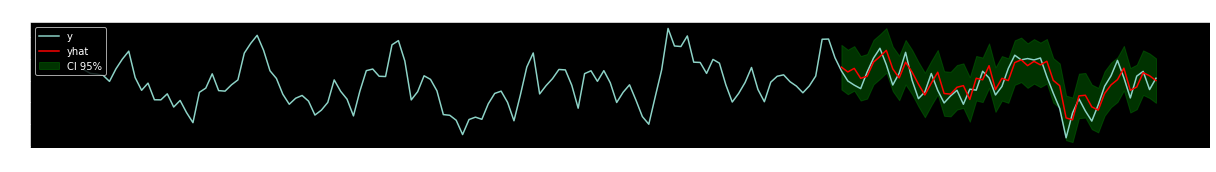

In [137]:
fg,ax = plt.subplots( figsize= (17,2.5) )

ax.plot( hosp_df['wait_times_hrs'], label= 'y' )
ax.plot( pred_mean_Ser, color= 'red', label= 'yhat' )
ax.fill_between( x= pred_CI_df .index, y1= pred_CI_df.iloc[:,0].values, y2= pred_CI_df.iloc[:,1].values,
                 alpha= 0.4, color= 'green', label= 'CI 95%' )
ax.legend( loc= 'upper left' ); ax.set_title( 'Insample prediction' )
plt.tight_layout(); plt.show()

#### Dynamic predictions

In [138]:
# insample dynamic prediction

dynamPred_insample_obj = armaModel_fit.get_prediction( start= -50, dynamic= True )

dynamPred_mean_Ser = dynamPred_insample_obj.predicted_mean
dynamPred_CI_df    = dynamPred_insample_obj.conf_int( alpha= 0.05 )

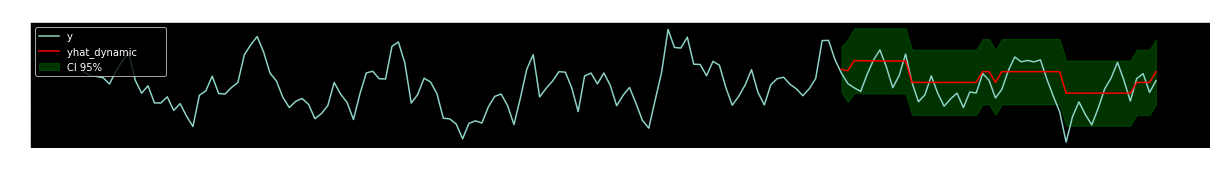

In [139]:
fg,ax = plt.subplots( figsize= (17,2.5) )

ax.plot( hosp_df['wait_times_hrs'], label= 'y' )
ax.plot( dynamPred_mean_Ser, color= 'red', label= 'yhat_dynamic        ' )
ax.fill_between( x= dynamPred_CI_df.index, y1= dynamPred_CI_df.iloc[:,0].values, y2= dynamPred_CI_df.iloc[:,1].values,
                 alpha= 0.4, color= 'green', label= 'CI 95%' )
ax.legend( loc= 'upper left' ); ax.set_title( 'Insample Dynamic prediction' )
plt.tight_layout(); plt.show()

<br>

#### Forecasting out-of-sample

In [229]:
yhat_steps = 50

forecast_obj = armaModel_fit.get_forecast( steps= yhat_steps, exog= hosp_df.iloc[ -yhat_steps:, 1 ] )

yhat = forecast_obj.predicted_mean
CI_df = forecast_obj.conf_int( alpha= 0.05 )

2019-03-10 23:00:00    1.497556
2019-03-11 00:00:00    1.649384
                         ...   
2019-03-12 23:00:00    1.514082
2019-03-13 00:00:00    1.751836
Freq: H, Name: predicted_mean, Length: 50, dtype: float64

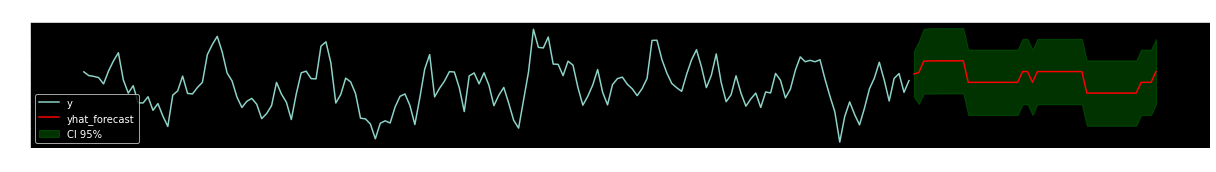

In [141]:
fg,ax = plt.subplots( figsize= (17,2.5) )

ax.plot( hosp_df['wait_times_hrs'], label= 'y' )
ax.plot( yhat, color= 'red', label= 'yhat_forecast' )
ax.fill_between( x= yhat.index, y1= CI_df.iloc[:,0].values, y2= CI_df.iloc[:,1].values,
                 alpha= 0.4, color= 'green', label= 'CI 95%' )
ax.legend( loc= 'lower left' ); ax.set_title( 'Forecasting out-of-sample' )
plt.tight_layout(); plt.show()

<br>

#### Rolling Forecasting 

In [441]:
warnings.filterwarnings( action= 'ignore' )
## modeling ARMA(1,1)

##### predict for next one future step at-a-time

In [442]:
data_sz = len(hosp_df)
train_sz = 110;     test_sz = data_sz - train_sz

yhat_roll = pd.Series( dtype= float )
CI_roll = pd.DataFrame( dtype= float )

for e_dt in range(test_sz-1):
    hosp_TrainEndog_ser = hosp_df['wait_times_hrs'].iloc[ :train_sz+e_dt ]
    hosp_TrainExog_ser  = hosp_df['nurse_count'].iloc[ :train_sz+e_dt ]
    
    armaModel_fit = SARIMAX( endog= hosp_TrainEndog_ser, exog= hosp_TrainExog_ser, order= (1,0,1), trend= 'c' ).fit()
    
    forecast_obj = armaModel_fit.get_forecast( steps= 1, exog= hosp_df['nurse_count'].iloc[ train_sz+e_dt+1:(train_sz+e_dt+1)+1 ] )    
    yhat = forecast_obj.predicted_mean;      CI_df = forecast_obj.conf_int()
#     print(yhat.index)
    
    yhat_roll = yhat_roll.append(yhat);      CI_roll = CI_roll.append( CI_df  )

In [443]:
# model eval stats

yi_yhat_Roll = hosp_df['wait_times_hrs'] - yhat_roll
yi_yhat_Roll_percent = yi_yhat_Roll/ hosp_df['wait_times_hrs'] * 100

print( f'Mean Absolute % Error = { np.round(np.mean(abs(yi_yhat_Roll_percent/100)),2) }              |                 \
Root mean Squared Error = { np.round(np.sqrt(np.mean(yi_yhat_Roll**2)),2) }' )   

Mean Absolute % Error = 0.22              |                 Root mean Squared Error = 0.29


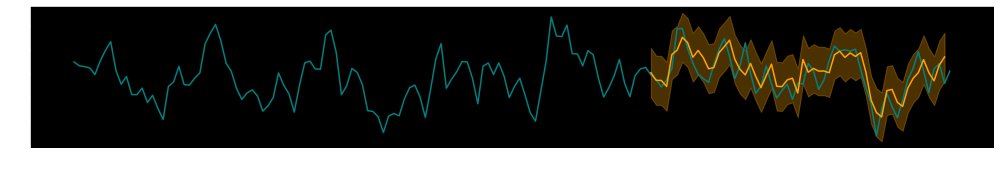

In [444]:
fg,ax = plt.subplots( figsize= (14,2.5) )

ax.plot( hosp_df.wait_times_hrs, color= 'teal', label= 'y' )
ax.plot( yhat_roll, color= 'orange', label= 'yhat_roll' )

ax.fill_between( x= yhat_roll.index, y1= CI_roll.iloc[:,0].values, y2= CI_roll.iloc[:,1].values,
                 alpha= 0.3, color= 'orange', label= 'CI 95%' )

plt.tight_layout();plt.show()

##### predict for next two future steps at-a-time

In [449]:
data_sz = len(hosp_df)
train_sz = 120;     test_sz = data_sz - train_sz
forecast_adv = 2

yhat_roll = pd.Series( dtype= float )
CI_roll = pd.DataFrame( dtype= float )

i = forecast_adv

for e_dt in range(test_sz//i):
    hosp_TrainEndog_ser = hosp_df['wait_times_hrs'].iloc[ :train_sz+i*e_dt ]
#     print( '\n', hosp_TrainEndog_ser.head(1), hosp_TrainEndog_ser.tail(1), '\n\n'  )
    armaModel_fit = SARIMAX( endog= hosp_TrainEndog_ser, order= (1,0,1), trend= 'c' ).fit()
    
    forecast_obj = armaModel_fit.get_forecast( steps= i )
    yhat = forecast_obj.predicted_mean;      CI_df = forecast_obj.conf_int()
#     print( f'yhat =\n{yhat}\n' )
    yhat_roll = yhat_roll.append(yhat);      CI_roll = CI_roll.append( CI_df  )

In [450]:
# model eval stats

# yhat_roll.index =  hosp_df.iloc[ train_sz: ].index

yi_yhat_Roll = hosp_df['wait_times_hrs'] - yhat_roll
yi_yhat_Roll_percent = yi_yhat_Roll/ hosp_df['wait_times_hrs'] * 100

# model stats
print( f'Mean Absolute % Error = { np.round(np.mean(abs(yi_yhat_Roll_percent/100)),2) }              |                 \
Root mean Squared Error = { np.round(np.sqrt(np.mean(yi_yhat_Roll**2)),2) }' )  

Mean Absolute % Error = 0.34              |                 Root mean Squared Error = 0.37


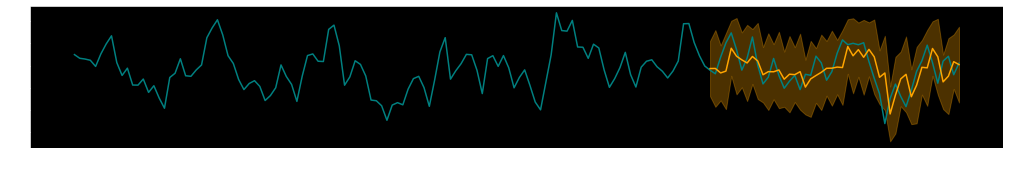

In [451]:
fg,ax = plt.subplots( figsize= (14,2.5) )

ax.plot( hosp_df.wait_times_hrs, color= 'teal', label= 'y' )
ax.plot( yhat_roll, color= 'orange', label= 'yhat_roll' )

ax.fill_between( x= yhat_roll.index, y1= CI_roll.iloc[:,0].values, y2= CI_roll.iloc[:,1].values,
                 alpha= 0.3, color= 'orange', label= 'CI 95%' )

plt.tight_layout();plt.show()

##### predict for next 3 future steps at-a-time

In [452]:
data_sz = len(hosp_df)
train_sz = 120;     test_sz = data_sz - train_sz
forecast_adv = 3

yhat_roll = pd.Series( dtype= float )
CI_roll = pd.DataFrame( dtype= float )

i = forecast_adv

for e_dt in range(test_sz//i):
    hosp_TrainEndog_ser = hosp_df['wait_times_hrs'].iloc[ :train_sz+i*e_dt ]
#     print( '\n', hosp_TrainEndog_ser.head(1), hosp_TrainEndog_ser.tail(1), '\n\n'  )
    armaModel_fit = SARIMAX( endog= hosp_TrainEndog_ser, order= (1,0,1), trend= 'c' ).fit()
    
    forecast_obj = armaModel_fit.get_forecast( steps= i )
    yhat = forecast_obj.predicted_mean;      CI_df = forecast_obj.conf_int()
#     print( f'yhat =\n{yhat}\n' )
    yhat_roll = yhat_roll.append(yhat);      CI_roll = CI_roll.append( CI_df  )

In [453]:
# model eval stats

# yhat_roll.index =  hosp_df.iloc[ train_sz: ].index

yi_yhat_Roll = hosp_df['wait_times_hrs'] - yhat_roll
yi_yhat_Roll_percent = yi_yhat_Roll/ hosp_df['wait_times_hrs'] * 100

# model stats
print( f'Mean Absolute % Error = { np.round(np.mean(abs(yi_yhat_Roll_percent/100)),2) }              |                 \
Root mean Squared Error = { np.round(np.sqrt(np.mean(yi_yhat_Roll**2)),2) }' )  

Mean Absolute % Error = 0.34              |                 Root mean Squared Error = 0.4


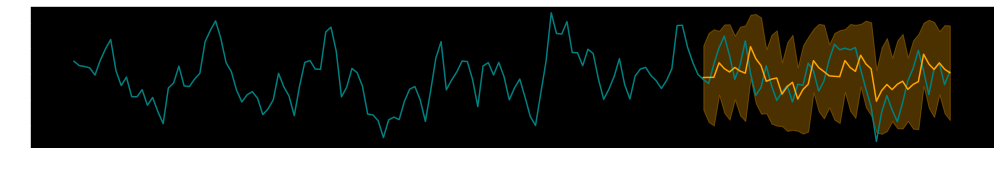

In [454]:
fg,ax = plt.subplots( figsize= (14,2.5) )

ax.plot( hosp_df.wait_times_hrs, color= 'teal', label= 'y' )
ax.plot( yhat_roll, color= 'orange', label= 'yhat_roll' )

ax.fill_between( x= yhat_roll.index, y1= CI_roll.iloc[:,0].values, y2= CI_roll.iloc[:,1].values,
                 alpha= 0.3, color= 'orange', label= 'CI 95%' )

plt.tight_layout();plt.show()

<br>

### `ARIMA` models

In the ARIMA model, the steps involded are:

    - taking the difference yt - yt-1
    - modeling the difference
    - predicting the difference and
    - integrating the difference such that actual yt is predicted

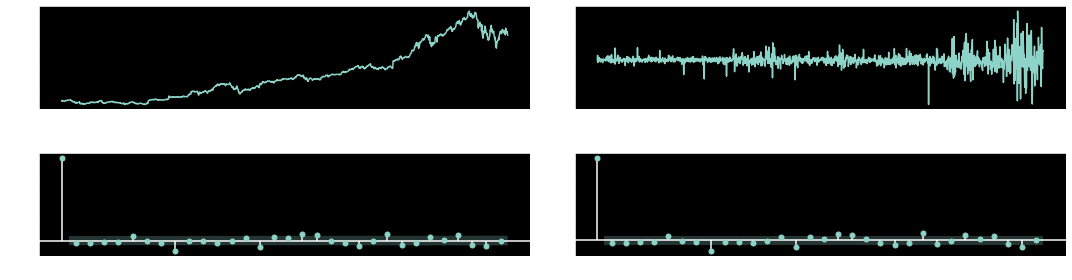

In [477]:
amz_df = pd.read_csv( 'datasets/amazon_close.csv', parse_dates= True, index_col= 0 )

fg, (ax) = plt.subplots( 2,2, figsize= (15,4) )

ax[0][0].plot( amz_df );     ax[0][1].plot( amz_df.diff() );
plot_acf( amz_df.diff().dropna(), ax= ax[1][0] ); plot_pacf( amz_df.diff().dropna(), ax= ax[1][1] );   

plt.tight_layout(); plt.show()

In [508]:
# model ARMA(2,2)

armaModel_fit = SARIMAX( endog= amz_df.diff(), order= (2,0,2) ).fit()

print( armaModel_fit.summary() )

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1259
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5534.654
Date:                Fri, 18 Jun 2021   AIC                          11079.308
Time:                        20:25:59   BIC                          11104.999
Sample:                             0   HQIC                         11088.963
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1772      0.103     -1.723      0.085      -0.379       0.024
ar.L2          0.7722      0.105      7.352      0.000       0.566       0.978
ma.L1          0.1639      0.098      1.669      0.0

Here we have a model which we can use to predict the <u>difference values</u>, <u>not the absolute value</u> of the amazon dataset.

#### Unrolling `ARMA` forecast

In [509]:
# arma forecast of next 10 differences
yhat_diff = armaModel_fit.get_forecast( steps= 10 ).predicted_mean

# Integrate the difference forecast
yhat_relative = np.cumsum( yhat_diff )

# make absolute value forecast
yhat_abs = yhat = yhat_relative + amz_df.iloc[-1].squeeze()

#### Fitting an `ARIMA` model

Instead of taking the difference, modeling the diff, predicting the diff, then integrating and thus predicitng the absolute `yt`, for forecasting the absolute values of the Amazon stocks dataset, this time lets use `ARIMA` model.

In [505]:
# model fit
arimaModel_fit = SARIMAX( endog= amz_df, order= (2,1,2) ).fit()
print( arimaModel_fit.summary() )                      #  <-- the result is same as in SARIMAX( amz_df.diff(), order= (2,0,2) ).fit()

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1259
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -5534.658
Date:                Fri, 18 Jun 2021   AIC                          11079.316
Time:                        20:22:45   BIC                          11105.002
Sample:                             0   HQIC                         11088.969
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1773      0.103     -1.724      0.085      -0.379       0.024
ar.L2          0.7723      0.105      7.352      0.000       0.566       0.978
ma.L1          0.1639      0.098      1.669      0.0

In [515]:
# ARIMA forecast of next 10 values
yhat = arimaModel_fit.get_forecast( steps= 10 ).predicted_mean
print( yhat, '\n\n' ,(yhat - yhat_abs).sum() )  #   <- yhat & yhat_abs are same

1259    360.000699
1260    360.587971
           ...    
1267    359.598855
1268    360.140311
Name: predicted_mean, Length: 10, dtype: float64 

 0.007376998921529321


<br>

### `ACF` & `PACF` roles in choosing model's order

##### We will use the `ACF` and `PACF` to decide whether this timeSeries data is best suited to an `MA` model or an `AR` model.

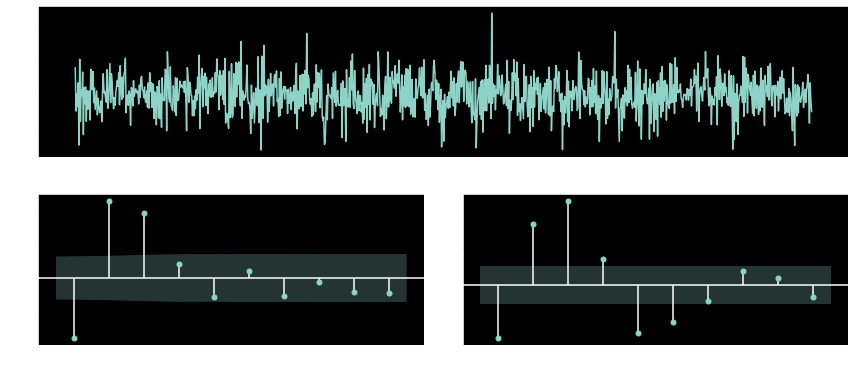

In [542]:
yi_df = pd.read_csv( 'datasets/timeSeries_yi.csv', parse_dates= True, index_col= 0 )

data_to_plt = yi_df

fg = plt.figure()
gs = GridSpec( 2,2, figure= fg, top= 1.3, right= 2, hspace= 0.25, wspace= 0.1 )
ax1 = fg.add_subplot( gs[0,:] )
ax2a = fg.add_subplot( gs[1,0] ); ax2b = fg.add_subplot( gs[1,1] )

ax1.plot( data_to_plt );
plot_acf( data_to_plt, zero= False, lags=10, ax= ax2a );      plot_pacf( data_to_plt, zero= False, lags=10, ax= ax2b );   

plt.tight_layout(); plt.show()

The `ACF` cuts off after 3 lags and the `PACF` tails off so a `MA(3)` model could be suitable.

##### We will use the `ACF` and `PACF` to decide whether earthquake frequency data is best suited to an `MA` model and/or an `AR` model

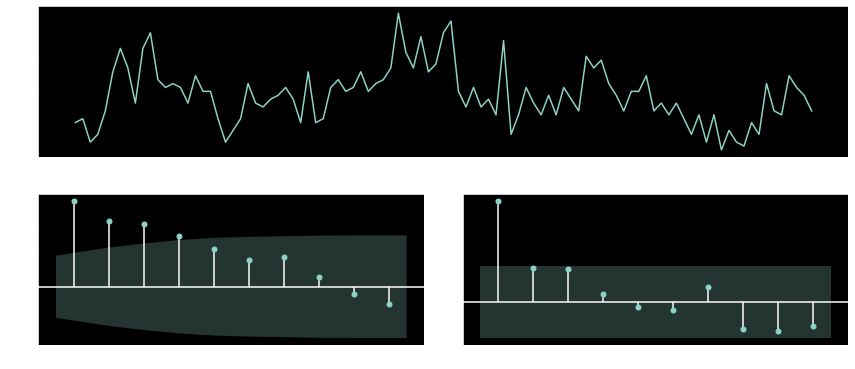

In [543]:
earthqk_df = pd.read_csv( 'datasets/earthquakes.csv', parse_dates= True, index_col= 0 )

data_to_plt = earthqk_df.earthquakes_per_year

fg = plt.figure()
gs = GridSpec( 2,2, figure= fg, top= 1.3, right= 2, hspace= 0.25, wspace= 0.1 )
ax1 = fg.add_subplot( gs[0,:] )
ax2a = fg.add_subplot( gs[1,0] ); ax2b = fg.add_subplot( gs[1,1] )   

ax1.plot( data_to_plt );
plot_acf( data_to_plt, zero= False, lags= 10, ax= ax2a );      plot_pacf( data_to_plt, zero= False, lags= 10, ax= ax2b );   

plt.tight_layout(); plt.show()

The `PACF` cuts off after 1 lag and the `ACF` tails off so a `AR(1)` model could be suitable.

<br>

### `AIC` & `BIC` roles in choosing model's order

#### Each model has: 

    - a log likelihood (L)
    - a number of parameters (k)
    - a number of samples used for fitting (n)

#### AIC &ensp; = &ensp; 2 &thinsp; k &thinsp; - &thinsp;  2 &thinsp; L
<b>⬇</b> AIC via <b>⬆</b> log likelihood and/or <b>⬇</b> parameters

#### BIC &ensp; = &ensp;  ln(n) &thinsp; k &thinsp; - &thinsp; 2 &thinsp;L
<b>⬇</b> BIC via <b>⬆</b> log likelihood and/or <b>⬇</b> parameters and/or <b>⬇</b> # samples used in fitting

<br>

#### Searching over model order

Here, we have a dataset which appears to be an `ARMA` model based on the `ACF` & `PACF` plots (below). In order to choose the best order for this model we are going to have to do a search over lots of potential model orders to find the best set.

c:\python-projects\machine-learning\lib\site-packages\ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


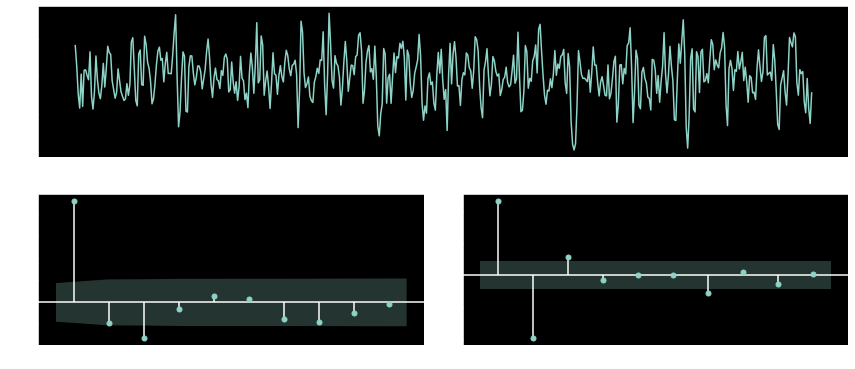

In [5]:
yi_df = pd.read_csv( 'datasets/yi_suitable_for_ARMA.csv', parse_dates= True, index_col= 0 )

data_to_plt = yi_df.yi

fg = plt.figure()
gs = GridSpec( 2,2, figure= fg, top= 1.3, right= 2, hspace= 0.25, wspace= 0.1 )
ax1 = fg.add_subplot( gs[0,:] )
ax2a = fg.add_subplot( gs[1,0] ); ax2b = fg.add_subplot( gs[1,1] )   

ax1.plot( data_to_plt );
plot_acf( data_to_plt, zero= False, lags= 10, ax= ax2a );      plot_pacf( data_to_plt, zero= False, lags= 10, ax= ax2b );   

plt.tight_layout(); plt.show()

##### looping through AIC & BIC for different orders

In [4]:
p_range, q_range = 4,4

pq_ABIC_ls = []

for p in range( p_range ):    
    for q in range( q_range ):
        
        armaModel_fit = SARIMAX( endog= yi_df, order= (p,0,q), trend= None ).fit()
        pq_ABIC_ls.append(   ( p, q, armaModel_fit.aic, armaModel_fit.bic ) )        

c:\python-projects\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python-projects\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python-projects\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python-projects\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python-projects\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 

In [6]:
# construct df of p,q,AIC,BIC

pq_ABIC_df = pd.DataFrame( data= pq_ABIC_ls, columns= [ 'p','q','aic','bic' ] )

pq_ABIC_df['aic_bic'] = (pq_ABIC_df.aic + pq_ABIC_df.bic)/2
pq_ABIC_df['pq'] = pq_ABIC_df.apply( lambda df: str(int(df.p)) + ',' + str(int(df.q)), axis= 1 )

pq_ABIC_df

p  q          aic          bic      aic_bic   pq
0   0  0  1615.493853  1619.708461  1617.601157  0,0
1   0  1  1429.988696  1438.417912  1434.203304  0,1
.. .. ..          ...          ...          ...  ...
14  3  2  1415.380206  1440.667854  1428.024030  3,2
15  3  3  1416.611496  1446.113753  1431.362625  3,3

[16 rows x 6 columns]

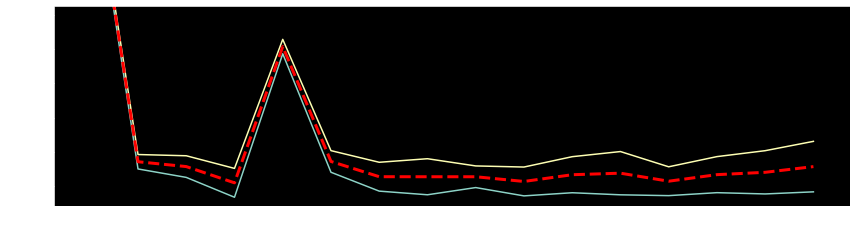

In [7]:
fg, (ax) = plt.subplots( figsize= (12,3.5) )

sns.lineplot( x= 'pq', y= 'aic', markers= 'o', data=pq_ABIC_df, ax= ax )
sns.lineplot( x= 'pq', y= 'bic', markers= 'o', data=pq_ABIC_df, ax= ax )
sns.lineplot( x= "pq", y= 'aic_bic', markers= 'o', data=pq_ABIC_df, ax= ax, color= 'red', linestyle= '--', linewidth= 3 )

plt.ylim( min( min(pq_ABIC_df.aic), min(pq_ABIC_df.bic) ) - 5, 1525  )
plt.tight_layout(); plt.show()

This time `AIC` & `BIC` favored the same model, but this won't always be the case.

In [8]:
pd.options.display.max_rows = 6

print( 'AIC sorted = \n\n', pq_ABIC_df[ ['aic','bic','aic_bic','pq'] ].sort_values('aic') )

print( '\nBIC sorted = \n\n', pq_ABIC_df[ ['aic','bic','aic_bic','pq'] ].sort_values('bic') )

print( '\nAIC+BIC  sorted = \n\n', pq_ABIC_df[ ['aic','bic','aic_bic','pq'] ].sort_values('aic_bic') )

AIC sorted = 

             aic          bic      aic_bic   pq
3   1413.451418  1430.309850  1421.880634  0,3
9   1414.248650  1431.107083  1422.677866  2,1
12  1414.393072  1431.251505  1422.822288  3,0
..          ...          ...          ...  ...
1   1429.988696  1438.417912  1434.203304  0,1
4   1497.307517  1505.736734  1501.522125  1,0
0   1615.493853  1619.708461  1617.601157  0,0

[16 rows x 4 columns]

BIC sorted = 

             aic          bic      aic_bic   pq
3   1413.451418  1430.309850  1421.880634  0,3
9   1414.248650  1431.107083  1422.677866  2,1
12  1414.393072  1431.251505  1422.822288  3,0
..          ...          ...          ...  ...
15  1416.611496  1446.113753  1431.362625  3,3
4   1497.307517  1505.736734  1501.522125  1,0
0   1615.493853  1619.708461  1617.601157  0,0

[16 rows x 4 columns]

AIC+BIC  sorted = 

             aic          bic      aic_bic   pq
3   1413.451418  1430.309850  1421.880634  0,3
9   1414.248650  1431.107083  1422.677866  2,1
12  14

#### `AIC & BIC` vs `ACF & PACF`

Let's apply an `AIC-BIC` order search for the earthquakes timeSeries. Earlier we prescribed that this dataset looked like an `AR(1)` process. We will do a grid search over parameters to see if we get the same results.

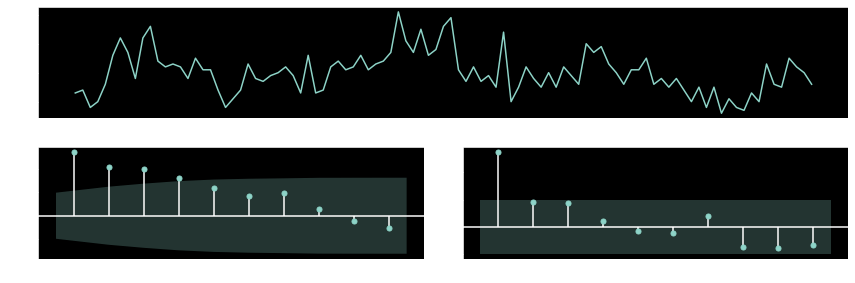

In [9]:
earthqk_df = pd.read_csv( 'datasets/earthquakes.csv', parse_dates= True, index_col= 0 )

data_to_plt = earthqk_df.earthquakes_per_year

fg = plt.figure()
gs = GridSpec( 2,2, figure= fg, top= 1, right= 2, hspace= 0.26, wspace= 0.1 )
ax1 = fg.add_subplot( gs[0,:] )
ax2a = fg.add_subplot( gs[1,0] ); ax2b = fg.add_subplot( gs[1,1] )   

ax1.plot( data_to_plt )
plot_acf( data_to_plt, zero= False, lags= 10, ax= ax2a );      plot_pacf( data_to_plt, zero= False, lags= 10, ax= ax2b );   

plt.show()

##### `try-except` when certain orders don't work

In [10]:
p_range, q_range = 5,5

pq_ABIC_ls = []

for p in range( p_range ):    
    for q in range( q_range ):
        
        try:
            armaModel_fit = SARIMAX(  endog= earthqk_df.earthquakes_per_year, order= (p,0,q), trend= None  ).fit()
            pq_ABIC_ls.append(  ( p, q, armaModel_fit.aic, armaModel_fit.bic )  )
        except: 
            pq_ABIC_ls.append(  ( p, q, None, None )  )            

c:\python-projects\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\python-projects\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\python-projects\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\python-projects\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\python-projects\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so

c:\python-projects\machine-learning\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\python-projects\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\python-projects\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\python-projects\machine-learning\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\python-projects\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will 

In [11]:
# construct df of p,q,AIC,BIC

pq_ABIC_df = pd.DataFrame( data= pq_ABIC_ls, columns= [ 'p','q','aic','bic' ] )

pq_ABIC_df['aic_bic'] = (pq_ABIC_df.aic + pq_ABIC_df.bic)/2
pq_ABIC_df['pq'] = pq_ABIC_df.apply( lambda df: str(int(df.p)) + ',' + str(int(df.q)), axis= 1 )

c:\python-projects\machine-learning\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


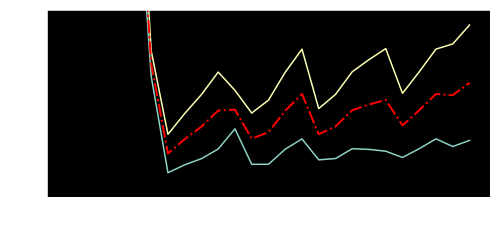

In [12]:
fg,ax = plt.subplots( figsize= (7,3.5) )

sns.lineplot( x= 'pq', y= 'aic', markers= 'o', data=pq_ABIC_df, ax= ax )
sns.lineplot( x= 'pq', y= 'bic', markers= 'o', data=pq_ABIC_df, ax= ax )
sns.lineplot( x= "pq", y= 'aic_bic', markers= 'o', data=pq_ABIC_df, ax= ax, color= 'red', linestyle= '-.', linewidth= 2 )

plt.ylim( min( min(pq_ABIC_df.aic), min(pq_ABIC_df.bic) ) - 5, 680  )
ax.set_xticklabels( labels= pq_ABIC_df.pq, rotation= 70 )
plt.tight_layout(); plt.show()

From the plot, we see that the `AIC` and `BIC` both actually favor an `ARMA(1,1)` model. This isn't what we prescribed earlier based on ACF & PACF; notice that in PACF - lag 2 & 3's values are very close to significant making it similar to `slow decay`, and thus the `ACF & PACF`  resembles the properties of an `ARMA(p,q)` model.

##### Final overall plots

c:\python-projects\machine-learning\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
c:\python-projects\machine-learning\lib\site-packages\ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


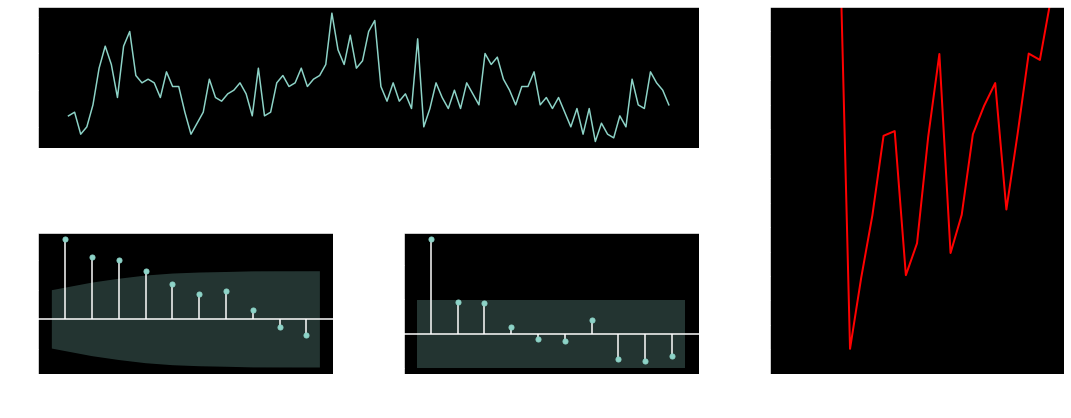

In [19]:
fg = plt.figure()
gs = GridSpec( 2,3, figure= fg, top= 1.4, right= 2.5, hspace= 0.6, wspace= 0.24 )
ax1a = fg.add_subplot( gs[0,:2] );  ax1b = fg.add_subplot( gs[:,2] )
ax2a = fg.add_subplot( gs[1,0] );  ax2b = fg.add_subplot( gs[1,1] )   

ax1a.plot( data_to_plt )
sns.lineplot( x= "pq", y= 'aic_bic', markers= 'o', data=pq_ABIC_df, color= 'red', linewidth= 2, ax= ax1b )
plot_acf( data_to_plt, zero= False, lags= 10, ax= ax2a );      plot_pacf( data_to_plt, zero= False, lags= 10, ax= ax2b );   

ax1b.set_ylim( 650, 665 )
ax1b.set_xticklabels( labels= pq_ABIC_df.pq, rotation= 90 )
set_ticks_for_axes( ax_ls= ax1b, x_y= 'y', minor_major= (1,2) )

plt.tight_layout(); plt.show()

<br>

### Model diagnostics

##### Mean Absolute Error

In [719]:
armaModel_fit = SARIMAX( endog= earthqk_df.earthquakes_per_year, order= (1,0,1), trend= None ).fit()

# MAE
mae = np.mean( np.abs(armaModel_fit.resid) ); 

4.7556256700051325

The `Mean Absolute Error` is about 4-5 earthquakes per year. Considering that there are about 20 earthquakes per year that is not too bad.

In [723]:
print( armaModel_fit.summary() )

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 1)   Log Likelihood                -320.566
Date:                  Sat, 19 Jun 2021   AIC                            647.132
Time:                          18:06:31   BIC                            654.918
Sample:                      01-01-1900   HQIC                           650.282
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9893      0.014     70.282      0.000       0.962       1.017
ma.L1         -0.5517      0.089     -6.198      0.000      -0.726      -0.377
sigma2        37.0254      4.980    

    pvalue(Q)  = 0.83 > 0.05 -->   Ho   -->   No AutoCorrelations in the residual
    pvalue(JB) = 0.25 > 0.05 -->   Ho   -->   Residual is Normally distributed

<br>

### Model Diagnostics plots

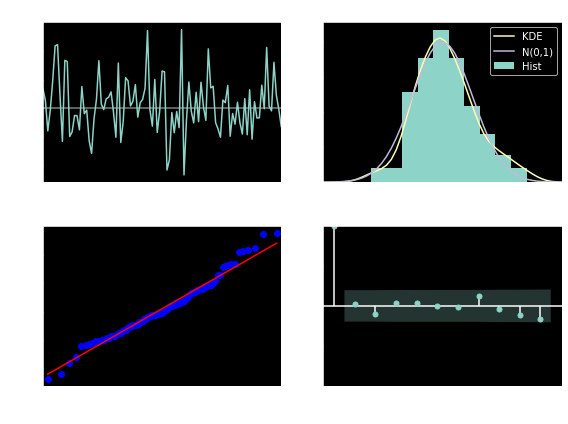

In [733]:
armaModel_fit.plot_diagnostics( figsize= (8,6) );
plt.tight_layout(); plt.show()

<br>

### `Box-Jenkins` methodology

#### (A) `Box-Jenkins` - <i>Identification</i>

The first step of the `Box-Jenkins` methodology is <i>Identification</i>. We will use the US data of a personal savings as % of disposable income 1955-1979.


ADF Statistic (tValue): -3.19    |    pValue: 0.02
The TimeSeries is Stationary not a Random Walk


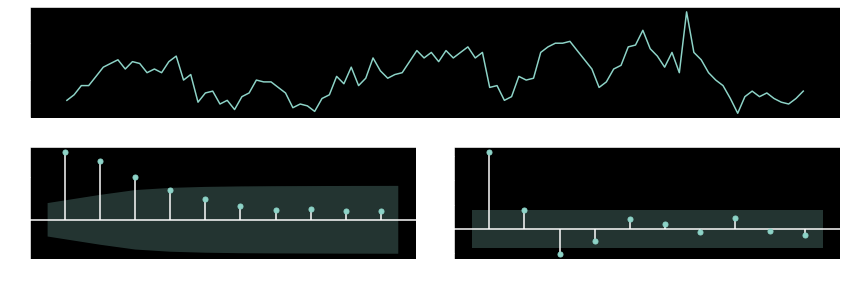

In [740]:
save_df = pd.read_csv( 'datasets/US-savings-percent.csv', parse_dates= True, index_col= 0 )

# augmented dickey-fuller test
adfuller_test(save_df)

# plots: TimeSeries, ACF & PACF
data_to_plt = save_df.saving_percent
fg = plt.figure()
gs = GridSpec( 2,2, figure= fg, top= 1, right= 2, hspace= 0.26, wspace= 0.1 )
ax1 = fg.add_subplot( gs[0,:] )
ax2a = fg.add_subplot( gs[1,0] ); ax2b = fg.add_subplot( gs[1,1] )   

ax1.plot( data_to_plt )
plot_acf( data_to_plt, zero= False, lags= 10, ax= ax2a );      plot_pacf( data_to_plt, zero= False, lags= 10, ax= ax2b );   
plt.show()

The `ACF` & the `PACF` are a little inconclusive for this case. The `ACF` tails off nicely but the `PACF` might be tailing off or it might be dropping off. So it could be an `ARMA(p,q)` model or a `AR(p)` model.

#### (B) `Box-Jenkins` - <i>Estimation</i>

`ACF` and `PACF` were a little inconclusive. The results suggest that the data could be an `ARMA(p,q)` model or could be an imperfect `AR(3)` model. Let's search over models over some model orders to find the best one according to `AIC` & `BIC`.

In [846]:
def normalize_func( col ):
    normzd = ( col - col.mean() ) / col.std()
    return(normzd)

In [847]:
p_range, q_range = 4,4

pq_ABIC_ls = [ ]

for p in range( p_range ):    
    for q in range( q_range ):        
        try:
            armaModel_fit = SARIMAX(  endog= save_df, order= (p,0,q), trend= None  ).fit()
            pq_ABIC_ls.append(  ( p, q, armaModel_fit.aic, armaModel_fit.bic )  )
        except: pq_ABIC_ls.append(  ( p, q, None, None )  )

In [849]:
# construct df of p,q,AIC,BIC
pq_ABIC_df = pd.DataFrame( data= pq_ABIC_ls, columns= [ 'p','q','aic','bic' ] )

# average of normalized aic & bic
pq_ABIC_df[ ['aic_norm','bic_norm'] ] = pq_ABIC_df[ ['aic','bic'] ].apply( lambda col:  ( col - col.mean() )/col.std() )
pq_ABIC_df['aic_bic_meanNormSum'] = ( pq_ABIC_df['aic_norm'] + pq_ABIC_df['bic_norm']  )/ 2

pq_ABIC_df['pq'] = pq_ABIC_df.apply( lambda df: str(int(df.p)) + ',' + str(int(df.q)), axis= 1 )

print( pq_ABIC_df.head(3) )

   p  q         aic         bic  aic_norm  bic_norm  aic_bic_meanNormSum   pq
0  0  0  668.752762  671.377735  2.555068  2.548403             2.551735  0,0
1  0  1  553.634202  558.884148  1.761533  1.758197             1.759865  0,1
2  0  2  472.294620  480.169539  1.200844  1.205270             1.203057  0,2


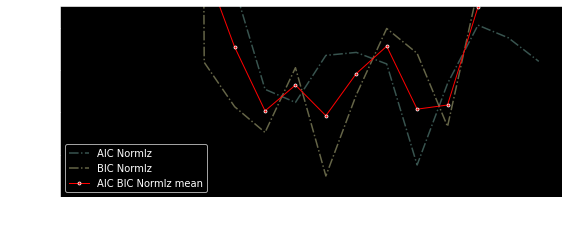

In [850]:
fg,ax = plt.subplots( figsize= (8,3.5) )

sns.lineplot( x= 'pq', y= 'aic_norm', markers= 'o', data=pq_ABIC_df, ax= ax, linestyle= '-.', alpha= 0.4, label= 'AIC Normlz' )
sns.lineplot( x= 'pq', y= 'bic_norm', markers= 'o', data=pq_ABIC_df, ax= ax, linestyle= '-.', alpha= 0.4, label= 'BIC Normlz' )
sns.lineplot( x='pq', y='aic_bic_meanNormSum', markers='o', data=pq_ABIC_df, ax=ax, color='red', marker= '.', linewidth=1, label='AIC BIC Normlz mean' )

plt.ylim( -0.56, -0.515 )
ax.set_xticklabels( labels= pq_ABIC_df.pq, rotation= 60 )
plt.tight_layout(); plt.show()

The `AIC` and `BIC` both picked the `ARMA(1,2)`, `AR(2,0)` and `AR(2,3)` model.

#### Estimation stage plots

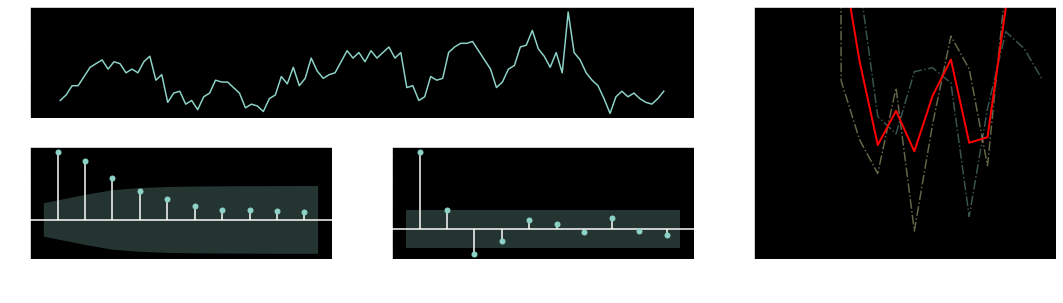

In [853]:
fg = plt.figure()
gs = GridSpec( 2,3, figure= fg, top= 1, right= 2.5, hspace= 0.26, wspace= 0.2 )
ax1a = fg.add_subplot( gs[0,:2] );  ax1b = fg.add_subplot( gs[:,2] )
ax2a = fg.add_subplot( gs[1,0] );  ax2b = fg.add_subplot( gs[1,1] )   

ax1a.plot( data_to_plt )

sns.lineplot( x= 'pq', y= 'aic_norm', markers= 'o', data= pq_ABIC_df, ax= ax1b, linestyle= '-.', alpha= 0.4 )
sns.lineplot( x= 'pq', y= 'bic_norm', markers= 'o', data= pq_ABIC_df, ax= ax1b, linestyle= '-.', alpha= 0.4 )
sns.lineplot( x= 'pq', y= 'aic_bic_meanNormSum', markers= 'x', data= pq_ABIC_df, ax= ax1b, color= 'red', linewidth= 2 )

plot_acf( data_to_plt, zero= False, lags= 10, ax= ax2a );      plot_pacf( data_to_plt, zero= False, lags= 10, ax= ax2b );   

ax1b.set_ylim( -0.56, -0.515 )
ax1b.set_xticklabels( labels= pq_ABIC_df.pq, rotation= 90 )

plt.show()

The `AIC` and `BIC` both picked the `ARMA(1,2)`, `AR(2,0)` and `AR(2,3)` model.

#### (C) `Box-Jenkins` - <i>Diagnostics</i>

So far we have found that the initial time series was `stationary`, but may have one outlying point. We identified promising model orders with the help of the `ACF` & `PACF` and confirmed these insights by training a multiple models.

We found that the `ARMA(1,2)` & `ARMA(2,3)` models are among the best fit to the data and now we want to check over the predictions it makes before we would move it into production.

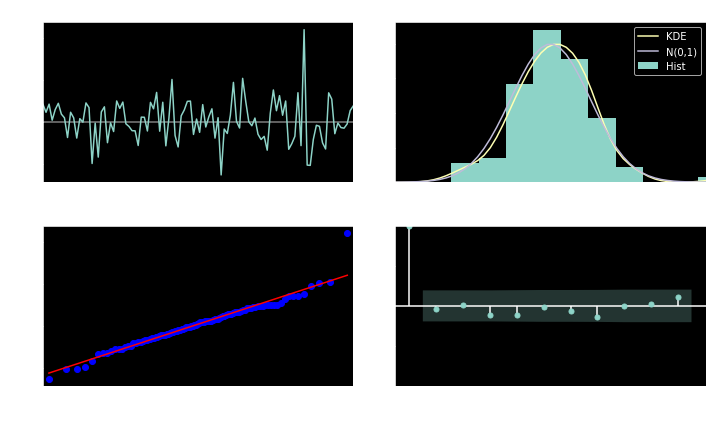

                               SARIMAX Results                                
Dep. Variable:         saving_percent   No. Observations:                  102
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -106.269
Date:                Sat, 19 Jun 2021   AIC                            220.537
Time:                        23:32:40   BIC                            231.037
Sample:                    01-01-1955   HQIC                           224.789
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9921      0.012     85.620      0.000       0.969       1.015
ma.L1         -0.1897      0.096     -1.985      0.047      -0.377      -0.002
ma.L2          0.2617      0.083      3.169      0.0

In [838]:
armaModel_fit = SARIMAX(  endog= save_df, order= (1,0,2), trend= None  ).fit()

armaModel_fit.plot_diagnostics( figsize= (10,6) );
plt.tight_layout(); plt.show()

print( armaModel_fit.summary() )

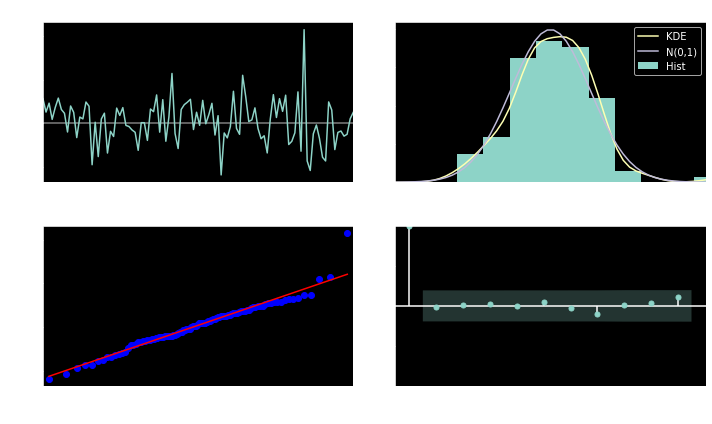

                               SARIMAX Results                                
Dep. Variable:         saving_percent   No. Observations:                  102
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -102.973
Date:                Sat, 19 Jun 2021   AIC                            217.946
Time:                        23:32:46   BIC                            233.696
Sample:                    01-01-1955   HQIC                           224.323
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6698      0.223      7.484      0.000       1.232       2.107
ar.L2         -0.6702      0.222     -3.020      0.003      -1.105      -0.235
ma.L1         -0.9443      0.241     -3.910      0.0

In [839]:
armaModel_fit = SARIMAX(  endog= save_df, order= (2,0,3), trend= None  ).fit()

armaModel_fit.plot_diagnostics( figsize= (10,6) );
plt.tight_layout(); plt.show()

print( armaModel_fit.summary() )

The `JB pValue` is zero, which means we accept alternate hypothesis(Ha) that the residuals are "abnormally" distributed. However, the histogram and Q-Q plots show that the residuals <i>look</i> normal. This time the `JB value` was thrown off by the one outlying point in the time series. In this case, we could go back and apply some transformation to remove this outlier or you probably just continue to the production stage.

<br>

## Seasonal ARIMA (`SARIMA`) Models

    
### Seasonal TimeSeries
<br>

#### Seasonal decompose

In [5]:
from statsmodels.tsa import seasonal

##### manually providing seasonality period is optional

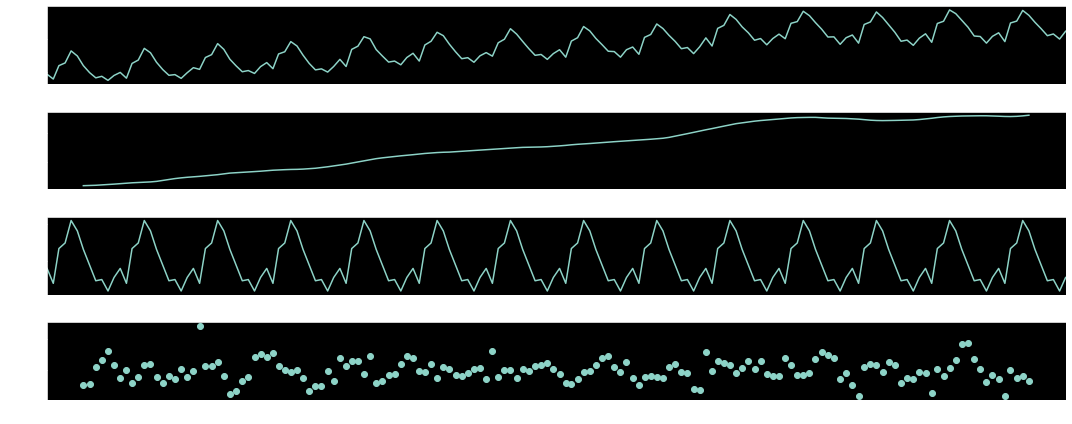

In [881]:
mlk_df = pd.read_csv( 'datasets/milk_production.csv', parse_dates= True, index_col= 0 )

# Perform additive decomposition
mlk_decompObj = seasonal.seasonal_decompose( mlk_df, model='additive', period= 12 )

rcParams['figure.figsize'] = 15,6
mlk_decompObj.plot( )
plt.tight_layout(); plt.show()

<br>

### Identifying seasonal data using ACF

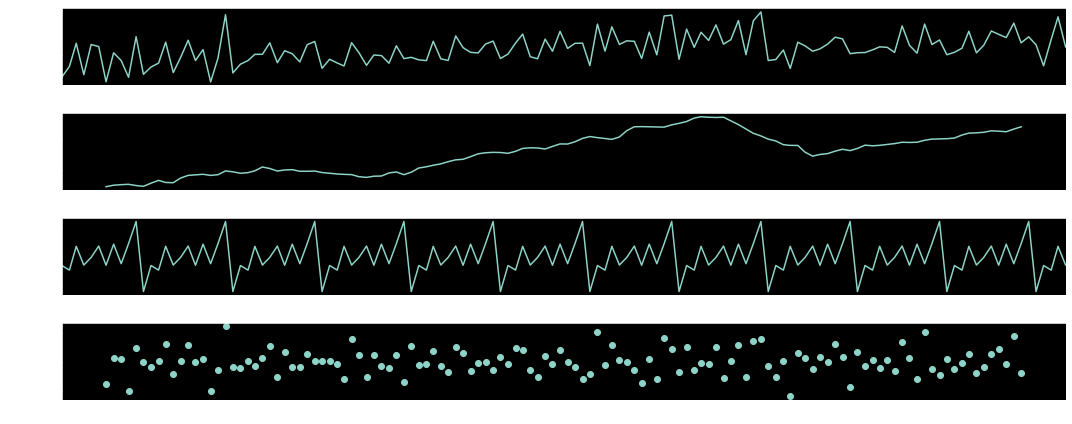

In [905]:
wtrConsm_df = pd.read_csv( 'datasets/water_consumer_amt.csv', parse_dates= True, index_col= 0 )

wtr_decompObj = seasonal.seasonal_decompose( wtrConsm_df )

wtr_decompObj.plot(); plt.tight_layout(); plt.show()

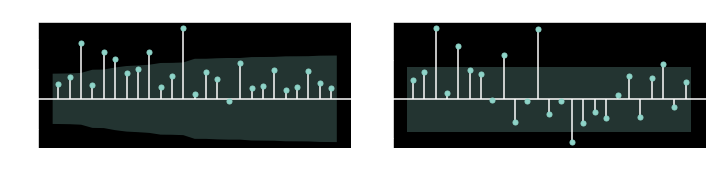

In [906]:
fg,(ax1,ax2) = plt.subplots( 1,2, figsize= (10,2.5) )

plot_acf( wtrConsm_df, ax= ax1, zero= False, lags= 25 );  plot_pacf( wtrConsm_df, ax= ax2, zero= False, lags= 25 )

plt.tight_layout(); plt.show()

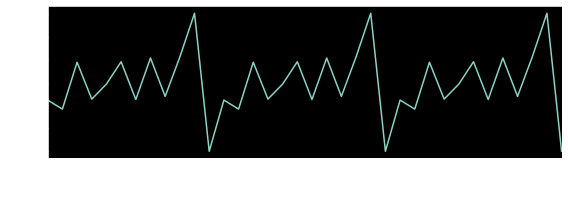

In [896]:
season1 = wtr_decompObj.seasonal

season1['1986':'1988'].plot( figsize= (8,3) )

plt.tight_layout()

The high peaks are happening every 12 months.

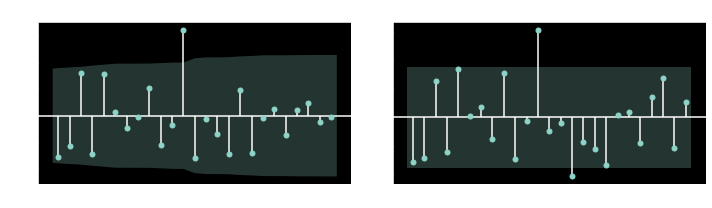

In [913]:
wtr_detrend_df = (  wtrConsm_df - wtrConsm_df.rolling( window= 15 ).mean()  ).dropna()

fg,(ax1,ax2) = plt.subplots( 1,2, figsize= (10,3) )

plot_acf( wtr_detrend_df, ax= ax1, zero= False, lags= 25 );  plot_pacf( wtr_detrend_df, ax= ax2, zero= False, lags= 25 )

plt.tight_layout(); plt.show()

Although we couldn't discern it by looking at the timeSeries plot itself, the `ACF` shows that there is an seasonal component and so considering this seasonality will definitely make our model better.

<br>

### `SARIMA` models<br>

Fitting a `SARIMA` model is like fitting two different `ARIMA` models at once:

    (i)  one to the seasonal part and
    (ii) another to the non-seasonal part

####  (A) `SARIMA` models -  Fitting SARIMA models

In [914]:
# SARIMAX(1,0,0)(1,1,0)7

sarimaModel_fit = SARIMAX( wtrConsm_df, order=(1,0,0), seasonal_order= (1,1,0,7) ).fit()
print( sarimaModel_fit.summary() )

                                     SARIMAX Results                                     
Dep. Variable:                      cosumers_amt   No. Observations:                  136
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood               -1248.851
Date:                           Sun, 20 Jun 2021   AIC                           2503.702
Time:                                   19:01:18   BIC                           2512.281
Sample:                               01-01-1983   HQIC                          2507.188
                                    - 04-01-1994                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0062      0.067      0.093      0.926      -0.124       0.137
ar.S.L7       -0.1563      0.036     -4.394

In [915]:
# SARIMAX(1,2,3)(4,5,6)12

sarimaModel_fit = SARIMAX( wtrConsm_df, order=(1,2,3), seasonal_order= (4,5,6,12) ).fit()
print( sarimaModel_fit.summary() )

                                              SARIMAX Results                                              
Dep. Variable:                                        cosumers_amt   No. Observations:                  136
Model:             SARIMAX(1, 2, 3)x(4, 5, [1, 2, 3, 4, 5, 6], 12)   Log Likelihood                -927.005
Date:                                             Sun, 20 Jun 2021   AIC                           1884.010
Time:                                                     19:02:58   BIC                           1918.571
Sample:                                                 01-01-1983   HQIC                          1897.797
                                                      - 04-01-1994                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

#### (B) `SARIMA` models - Choosing SARIMA order (P,Q)

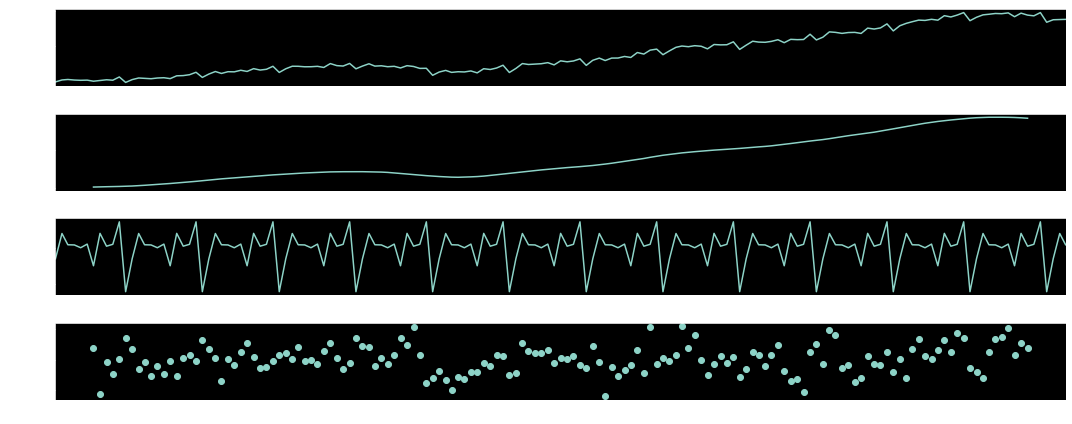

In [3]:
empK_df = pd.read_csv( 'datasets/employed_k.csv', parse_dates= True, index_col= 0 )
empK_decompObj = seasonal.seasonal_decompose( empK_df, model= 'additive' )

rcParams['figure.figsize'] = 15,6
empK_decompObj.plot(); plt.show()

In [8]:
# Take the 1st & seasonal differences

empK_1st_S_diff_df = empK_df.diff().diff(12).dropna()            # OR
empK_1st_S_diff_df = empK_df.diff(12).diff().dropna()           # the diff order doesn't matter

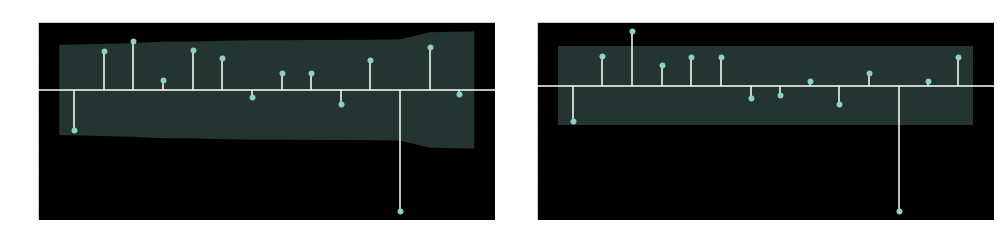

In [9]:
fg,(ax1,ax2) = plt.subplots( 1,2, figsize= (14,3.5) )

plot_acf( empK_1st_S_diff_df, ax= ax1, zero= False, lags= 14 );  plot_pacf( empK_1st_S_diff_df, ax= ax2, zero= False, lags= 14 )

set_ticks_for_axes( ax_ls= [ax1,ax2], x_y= 'x', minor_major= (1,2) )
plt.tight_layout(); plt.show()

##### `ACF` & `PACF` for list of lags

[12, 24, 36, 48, 60]


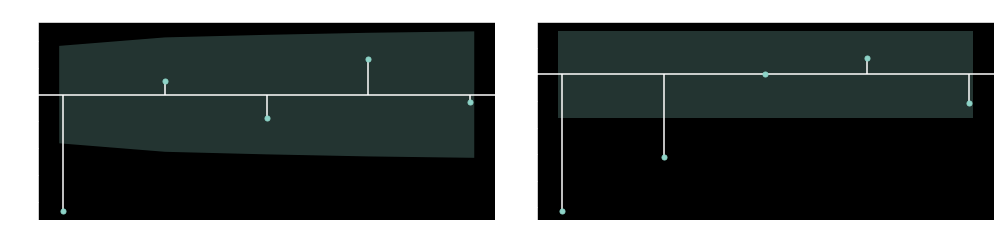

In [10]:
seasonal_lag_extent = 6
lag_ls = [ 12*x for x in range(1,seasonal_lag_extent) ]   ;  print( lag_ls )

fg,(ax1,ax2) = plt.subplots( 1,2, figsize= (14,3.5) )

plot_acf( empK_1st_S_diff_df, ax= ax1, zero= False, lags= lag_ls )
plot_pacf( empK_1st_S_diff_df, ax= ax2, zero= False, lags= lag_ls )

set_ticks_for_axes( ax_ls= [ax1,ax2], x_y= 'x', minor_major= (1,10) )
plt.tight_layout(); plt.show()

    - the non-seasonal ACF doesn't show any of the usual patterns of `MA`, `AR` or `ARMA` models so we choose none       of these
    - the Seasonal ACF & PACF look like an MA(1) model
    
Thus we select the model `SARIMA( 0,1,0 ) ( 0,1,1,12 )` such that <br>
`p=0, d=1, q=0, P=0, D=1, Q=1, S=12`

<br>

### `SARIMA` vs. `ARIMA` model<br>

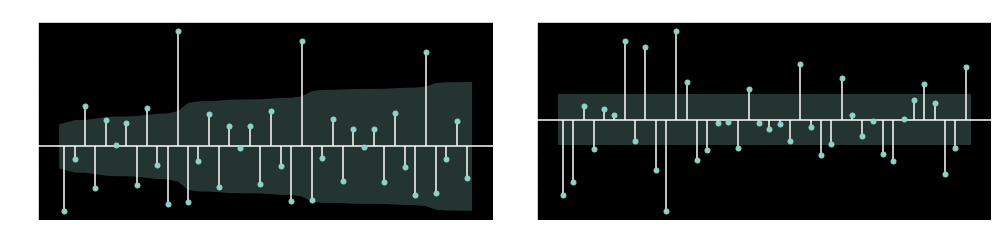

In [11]:
empK_df = pd.read_csv( 'datasets/employed_k.csv', parse_dates= True, index_col= 0 )
empK_nDiff_df = empK_df.diff().dropna()           

fg,(ax1,ax2) = plt.subplots( 1,2, figsize= (14,3.5) )
plot_acf( empK_nDiff_df, ax= ax1, zero= False, lags= 40 );  plot_pacf( empK_nDiff_df, ax= ax2, zero= False, lags= 40 )
set_ticks_for_axes( ax_ls= [ax1,ax2], x_y= 'x', minor_major= (1,2) )
plt.tight_layout(); plt.show()

In [43]:
warnings.filterwarnings( action= 'ignore' )

p_range, q_range = 16,16

pq_ABIC_ls = []

data_to_modelFit = empK_df['num_employed_k']

for p in range( p_range ):    
    for q in range( q_range ):        
        try:
            armaModel_fit = SARIMAX(  endog= data_to_modelFit, order= (p,1,q), trend= None  ).fit()
            pq_ABIC_ls.append(  ( p, q, armaModel_fit.aic, armaModel_fit.bic )  )
        except: 
            pq_ABIC_ls.append(  ( p, q, None, None )  )            

In [8]:
# construct df of p,q,AIC,BIC

pq_ABIC_df = pd.DataFrame( data= pq_ABIC_ls, columns= [ 'p','q','aic','bic' ] )

pq_ABIC_df['aic_bic'] = (pq_ABIC_df.aic + pq_ABIC_df.bic)/2
pq_ABIC_df['pq'] = pq_ABIC_df.apply( lambda df: str(int(df.p)) + ',' + str(int(df.q)), axis= 1 )

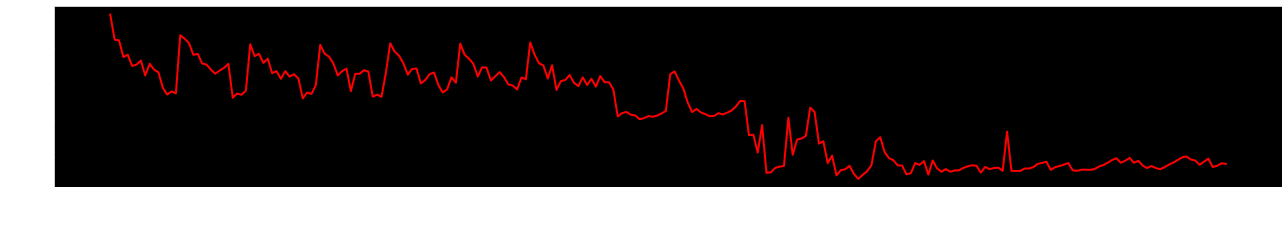

In [19]:
fg,ax = plt.subplots( figsize= (18,3.5) )

sns.lineplot( x= "pq", y= 'aic_bic', markers= 'o', data=pq_ABIC_df, ax= ax, color= 'red', linewidth= 2 )

ax.set_xticklabels( labels= pq_ABIC_df.pq, rotation= 90 )
plt.tight_layout(); plt.show()

In [39]:
# selecting only n smallest values
pq_ABIC_nsmallest_df =  pq_ABIC_df.nsmallest( n= 50, columns= 'aic_bic' ).sort_values( ['p','q'] )

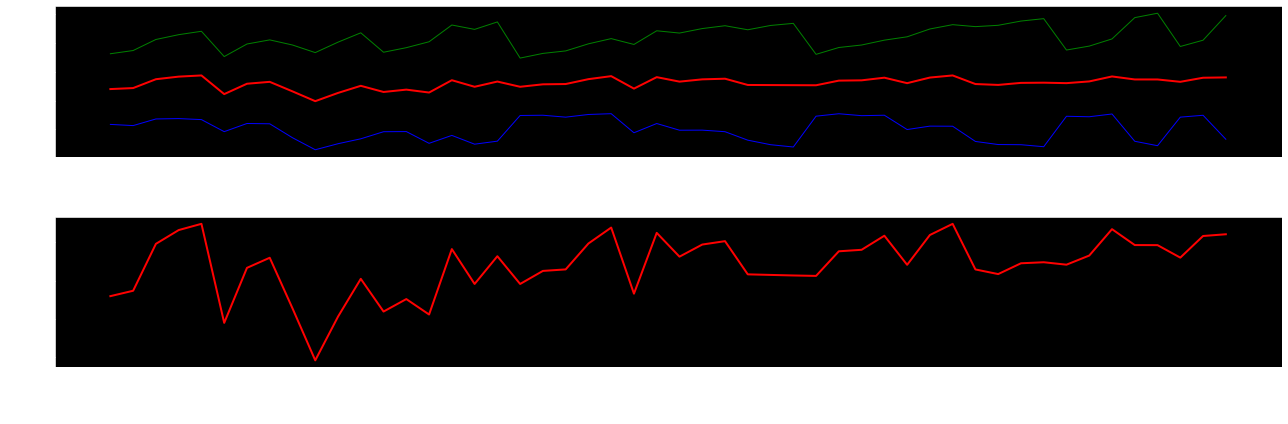

In [53]:
fg,(ax1,ax2) = plt.subplots( 2,1, figsize= (18,6) )

sns.lineplot( x= "pq", y= 'aic_bic', data= pq_ABIC_nsmallest_df, ax= ax1, color= 'red', linewidth= 2 )
sns.lineplot( x= "pq", y= 'aic', data= pq_ABIC_nsmallest_df, ax= ax1, color= 'orange', linewidth= 1 )
sns.lineplot( x= "pq", y= 'bic', data= pq_ABIC_nsmallest_df, ax= ax1, color= 'green', linewidth= 1 )

sns.lineplot( x= "pq", y= 'aic_bic', data= pq_ABIC_nsmallest_df, ax= ax2, color= 'red', linewidth= 2 )

ax1.set_xticklabels( labels= pq_ABIC_nsmallest_df.pq, rotation= 90 );
ax2.set_xticklabels( labels= pq_ABIC_nsmallest_df.pq, rotation= 90 );

plt.tight_layout(); plt.show()

model fit and forecast

In [66]:
# Train-Test
train_end_dt = datetime.datetime( 1986,12,31 )
empK_Train_df = empK_df[ : train_end_dt ]

# number of months for Test

test_start_dt = train_end_dt  ;          test_end_dt = empK_df.iloc[-1].name

num_months = ( test_end_dt.year - test_start_dt.year )*12 + ( test_end_dt.month - test_start_dt.month )

In [67]:
# ARIMA model fit
arimaModel_fit = SARIMAX( endog= empK_Train_df, order= (10,1,11), trend= 'c' ).fit()
yhat_Arima = arimaModel_fit.get_forecast( steps= 47 ).predicted_mean

# SARIMA model fit - ( 0,1,0 ) ( 0,1,1,12 )
sarimaModel_fit = SARIMAX( endog= empK_Train_df, order= (0,1,0), seasonal_order= (0,1,1,12), trend= 'c' ).fit()
yhat_Sarima = sarimaModel_fit.get_forecast( steps= 47 ).predicted_mean

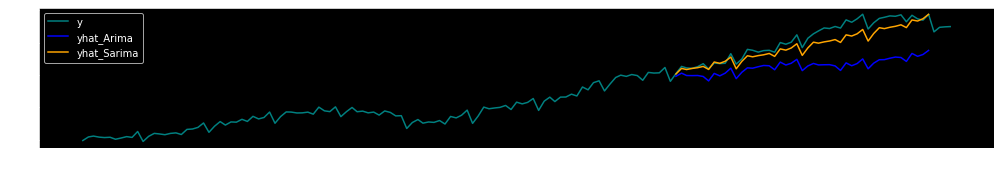

In [68]:
fg,ax = plt.subplots( figsize= (14,2.5) )

ax.plot( empK_df, color= 'teal', label= 'y' )
ax.plot( yhat_Arima, color= 'blue', label= 'yhat_Arima' )
ax.plot( yhat_Sarima, color= 'orange',  label= 'yhat_Sarima' )

ax.legend()

plt.tight_layout();plt.show()

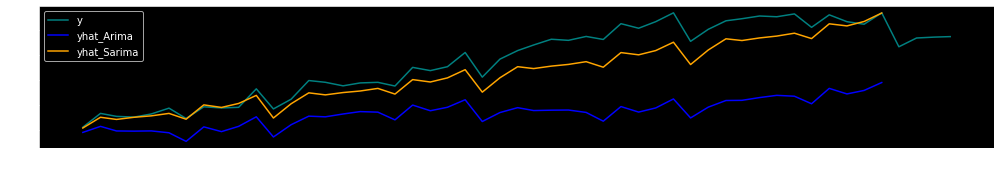

In [69]:
fg,ax = plt.subplots( figsize= (14,2.5) )

begin_dt = '1987'

ax.plot( empK_df[begin_dt:], color= 'teal', label= 'y' )
ax.plot( yhat_Arima, color= 'blue', label= 'yhat_Arima' )
ax.plot( yhat_Sarima, color= 'orange',  label= 'yhat_Sarima' )

ax.legend()

plt.tight_layout();plt.show()

We can see that the `SARIMA` model has forecast the upward trend and the seasonal cycle with better result. This makes the `SARIMA` forecast much closer to the truth for this employment seasonal data.

#### Use `ARIMA` model & `SARIMA` model for `rolling prediction` for 5 months at a time

In [70]:
test_start_dt = datetime.datetime( 1987,1,1 )
empK_Test_df = empK_df[ test_start_dt: ]

data_sz = len(empK_df);    test_sz = len(empK_Test_df);   train_sz = data_sz - test_sz 
forecast_adv = 6

yhat_roll_ARIMA  = pd.Series( dtype= float );  CI_roll_ARIMA  = pd.DataFrame( dtype= float )
yhat_roll_SARIMA = pd.Series( dtype= float );  CI_roll_SARIMA = pd.DataFrame( dtype= float )

i = forecast_adv

for e_dt in range(test_sz//i):
    empK_Train_df = empK_df['num_employed_k'].iloc[ :train_sz+i*e_dt ]

    arimaModel_fit  = SARIMAX( endog= empK_Train_df, order= (10,1,11), trend= 'c' ).fit()
    sarimaModel_fit = SARIMAX( endog= empK_Train_df, order= (0,1,0), seasonal_order= (0,1,1,12), trend= 'c' ).fit()

    # ARIMA forecast
    forecast_ARIMA_obj = arimaModel_fit.get_forecast( steps= i )
    yhat_ARIMA_df = forecast_ARIMA_obj.predicted_mean;        CI_ARIMA_df = forecast_ARIMA_obj.conf_int()
    yhat_roll_ARIMA = yhat_roll_ARIMA.append(yhat_ARIMA_df);  CI_roll_ARIMA = CI_roll_ARIMA.append(CI_ARIMA_df)
    
    # SARIMA forecast
    forecast_SARIMA_obj = sarimaModel_fit.get_forecast( steps= i )
    yhat_SARIMA_df = forecast_SARIMA_obj.predicted_mean;        CI_SARIMA_df = forecast_SARIMA_obj.conf_int()
    yhat_roll_SARIMA = yhat_roll_SARIMA.append(yhat_SARIMA_df); CI_roll_SARIMA = CI_roll_SARIMA.append(CI_SARIMA_df)

In [71]:
## model eval stats: for ARIMA
yi_yhat_Roll = empK_df['num_employed_k'] - yhat_roll_ARIMA
yi_yhat_Roll_percent = yi_yhat_Roll/ empK_df['num_employed_k'] * 100

# model stats
print( f'Mean Absolute % Error = { np.round(np.mean(abs(yi_yhat_Roll_percent/100)),2) }              |                 \
Root mean Squared Error = { np.round(np.sqrt(np.mean(yhat_roll_ARIMA**2)),2) }' )  

Mean Absolute % Error = 0.01              |                 Root mean Squared Error = 7513.46


In [72]:
## model eval stats: for SARIMA
yi_yhat_Roll = empK_df['num_employed_k'] - yhat_roll_SARIMA
yi_yhat_Roll_percent = yi_yhat_Roll/ empK_df['num_employed_k'] * 100

# model stats
print( f'Mean Absolute % Error = { np.round(np.mean(abs(yi_yhat_Roll_percent/100)),2) }              |                 \
Root mean Squared Error = { np.round(np.sqrt(np.mean(yhat_roll_SARIMA**2)),2) }' )  

Mean Absolute % Error = 0.01              |                 Root mean Squared Error = 7568.65


##### plot ARIMA, SARIMA's roll prediction (for 6 months at-a-time) with CI

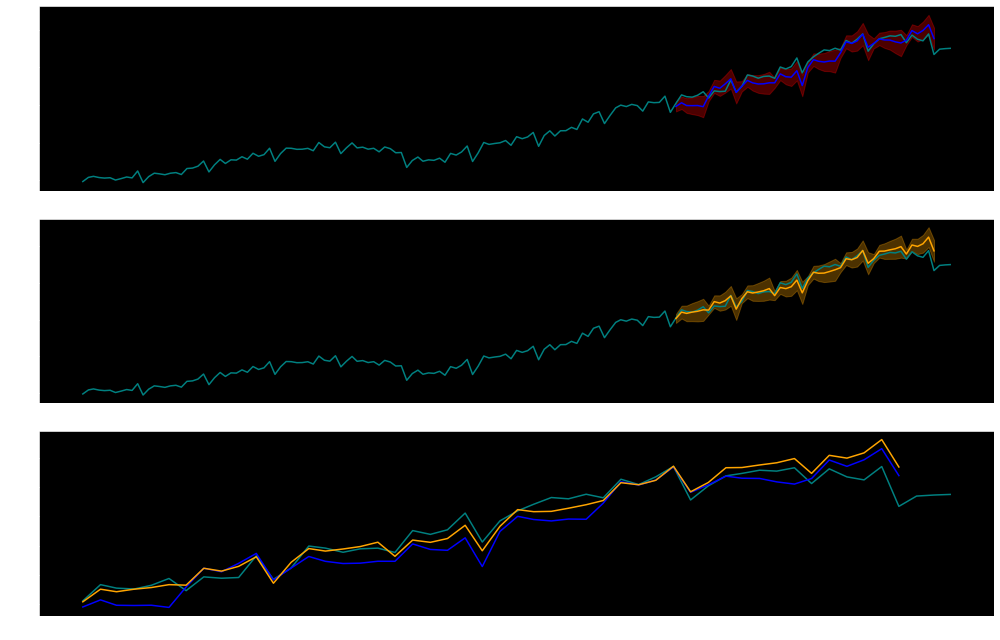

In [75]:
fg,(ax1,ax2,ax3) = plt.subplots( 3,1, figsize= (14,3*3) )

ax1.plot( empK_df['num_employed_k'], color= 'teal', label= 'y' )
ax1.plot( yhat_roll_ARIMA, color= 'blue', label= 'yhat_roll_Arima' )
ax1.fill_between( x= yhat_roll_ARIMA.index, y1= CI_roll_ARIMA.iloc[:,0].values, y2= CI_roll_ARIMA.iloc[:,1].values,
                 alpha= 0.3, color= 'red', label= 'CI 95%' )

ax2.plot( empK_df['num_employed_k'], color= 'teal', label= 'y' )
ax2.plot( yhat_roll_SARIMA, color= 'orange', label= 'yhat_roll_Sarima' )
ax2.fill_between( x= yhat_roll_SARIMA.index,
                  y1= CI_roll_SARIMA.iloc[:,0].values, y2= CI_roll_SARIMA.iloc[:,1].values,
                 alpha= 0.3, color= 'orange', label= 'CI 95%' )

ax3.plot( empK_df['1987':], color= 'teal', label= 'y' )
ax3.plot( yhat_roll_ARIMA,  color= 'blue', label= 'yhat_roll_Arima' )
ax3.plot( yhat_roll_SARIMA, color= 'orange', label= 'yhat_roll_Sarima' )

plt.tight_layout();plt.show()

<br>

###  Model Optimization Automation and saving<br>

In [78]:
import pmdarima as pm

In [100]:
arimaModel_obj = pm.auto_arima( empK_df,
                                 d= 1, start_p= 0, start_q= 0, max_p= 14, max_q= 14, trend= 'c',                                 
                                 stepwise= True, seasonal= False )
arimaModel_obj.summary()

In [147]:
sarimaModel_obj = pm.auto_arima( empK_df, 
                                 d= 1, start_p= 0, start_q= 0, max_p= 14, max_q= 14,
                                 D= 2, start_P= 0, start_Q= 0, max_P= 4, max_Q = 4,  trend= 'c', 
                                 stepwise= True, m= 12, seasonal= True )
sarimaModel_obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  159
Model:             SARIMAX(0, 1, 0)x(3, 2, [1], 12)   Log Likelihood                -686.881
Date:                              Mon, 21 Jun 2021   AIC                           1385.763
Time:                                      20:42:31   BIC                           1403.150
Sample:                                           0   HQIC                          1392.828
                                              - 159                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.2587      1.157     -1.088      0.276      -3.526       1.008
ar.S.L12      -0.6321      0.128     -4.942      0.000      -0.883      -0.381
ar.S.L24      -0.3771      0.128     -2.941      0.003      -0.628      -0.126
ar.S.L36      -0.2372      0.113     -2.101      0.036      -0.459      -0.016
ma.S.L12      -0.8444      0.198     -4.268      0.000      -1.232      -0.457
sigma2      1259.6831    182.208      6.913      0.000     902.562    1616.804
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 4.80
Prob(Q):                              0.43   Prob(JB):                         0.09
Heteroskedasticity (H):               1.72   Skew:                             0.45
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### rolling prediction for the model

In [102]:
test_start_dt = datetime.datetime( 1987,1,1 )
empK_Test_df = empK_df[ test_start_dt: ]

data_sz = len(empK_df);    test_sz = len(empK_Test_df);   train_sz = data_sz - test_sz 
forecast_adv = 6

yhat_roll_ARIMA  = pd.Series( dtype= float );  CI_roll_ARIMA  = pd.DataFrame( dtype= float )
yhat_roll_SARIMA = pd.Series( dtype= float );  CI_roll_SARIMA = pd.DataFrame( dtype= float )

i = forecast_adv

for e_dt in range(test_sz//i):
    empK_Train_df = empK_df['num_employed_k'].iloc[ :train_sz+i*e_dt ]

    arimaModel_fit  = SARIMAX( endog= empK_Train_df, order= (4,1,1), trend= 'c' ).fit()
    sarimaModel_fit = SARIMAX( endog= empK_Train_df, order= (0,1,0), seasonal_order= (3,2,1,12), trend= 'c' ).fit()

    # ARIMA forecast
    forecast_ARIMA_obj = arimaModel_fit.get_forecast( steps= i )
    yhat_ARIMA_df = forecast_ARIMA_obj.predicted_mean;        CI_ARIMA_df = forecast_ARIMA_obj.conf_int()
    yhat_roll_ARIMA = yhat_roll_ARIMA.append(yhat_ARIMA_df);  CI_roll_ARIMA = CI_roll_ARIMA.append(CI_ARIMA_df)
    
    # SARIMA forecast
    forecast_SARIMA_obj = sarimaModel_fit.get_forecast( steps= i )
    yhat_SARIMA_df = forecast_SARIMA_obj.predicted_mean;        CI_SARIMA_df = forecast_SARIMA_obj.conf_int()
    yhat_roll_SARIMA = yhat_roll_SARIMA.append(yhat_SARIMA_df); CI_roll_SARIMA = CI_roll_SARIMA.append(CI_SARIMA_df)

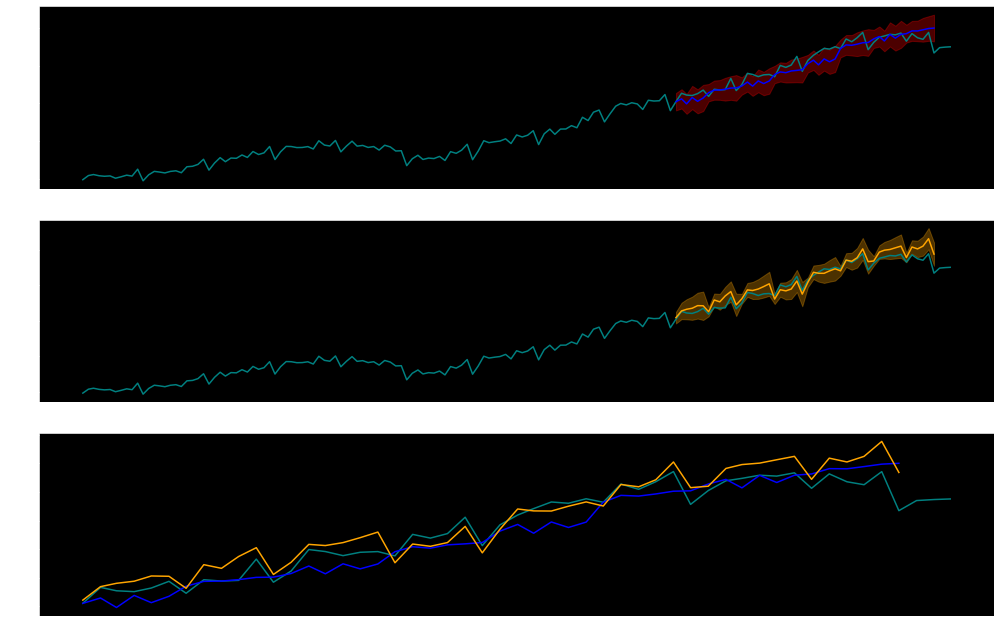

In [103]:
fg,(ax1,ax2,ax3) = plt.subplots( 3,1, figsize= (14,3*3) )

ax1.plot( empK_df['num_employed_k'], color= 'teal', label= 'y' )
ax1.plot( yhat_roll_ARIMA, color= 'blue', label= 'yhat_roll_Arima' )
ax1.fill_between( x= yhat_roll_ARIMA.index, y1= CI_roll_ARIMA.iloc[:,0].values, y2= CI_roll_ARIMA.iloc[:,1].values,
                 alpha= 0.3, color= 'red', label= 'CI 95%' )

ax2.plot( empK_df['num_employed_k'], color= 'teal', label= 'y' )
ax2.plot( yhat_roll_SARIMA, color= 'orange', label= 'yhat_roll_Sarima' )
ax2.fill_between( x= yhat_roll_SARIMA.index,
                  y1= CI_roll_SARIMA.iloc[:,0].values, y2= CI_roll_SARIMA.iloc[:,1].values,
                  alpha= 0.3, color= 'orange', label= 'CI 95%' )

ax3.plot( empK_df['1987':], color= 'teal', label= 'y' )
ax3.plot( yhat_roll_ARIMA,  color= 'blue', label= 'yhat_roll_Arima' )
ax3.plot( yhat_roll_SARIMA, color= 'orange', label= 'yhat_roll_Sarima' )

plt.tight_layout();plt.show()


### Saving, loading and updating model

In [107]:
import joblib

In [148]:
# save model to a file
fn = 'datasets/sarimaModelObj_06212021.pkl'

joblib.dump( sarimaModel_obj, filename= fn )

['datasets/sarimaModelObj_06212021.pkl']

In [149]:
# load the saved model

loaded_sarimaModel_obj = joblib.load( filename= fn )

print( loaded_sarimaModel_obj ); loaded_sarimaModel_obj

 ARIMA(0,1,0)(3,2,1)[12] intercept


ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(3, 2, 1, 12),
      suppress_warnings=True, trend='c')

#### update the saved & loaded SARIMA model (model's params) with additional observation

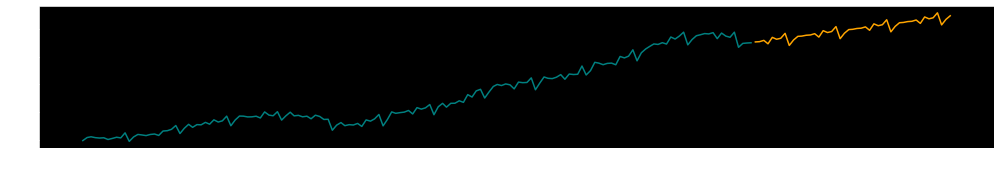

In [150]:
# creating a new data 
sarimaModel_fit = SARIMAX( endog= empK_df, order= (0,1,0), seasonal_order= (0,1,1,12), trend= 'c' ).fit()
yhat_Sarima_df = sarimaModel_fit.get_forecast( steps= 47 ).predicted_mean

yhat_Sarima_df.to_csv( 'datasets/employed_k_updated_data.csv', index_label= 'date', header= ['num_employed_k'] )

fg,ax = plt.subplots( figsize= (14,2.5) )
ax.plot( empK_df, color= 'teal' ); ax.plot( yhat_Sarima, color= 'orange' )
plt.tight_layout()

In [151]:
# updating the model with new observation

empK_newObsv_df = pd.read_csv( 'datasets/employed_k_updated_data.csv', parse_dates= True, index_col= 0 )

loaded_sarimaModel_obj.update( empK_newObsv_df )

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(3, 2, 1, 12),
      suppress_warnings=True, trend='c')

<br>

### `SARIMA` and `Box-Jenkins`<br>

In [155]:
co2_df = pd.read_csv( 'datasets/co2.csv', parse_dates= True, index_col= 0 )

co2_diff_df = co2_df.diff().dropna()

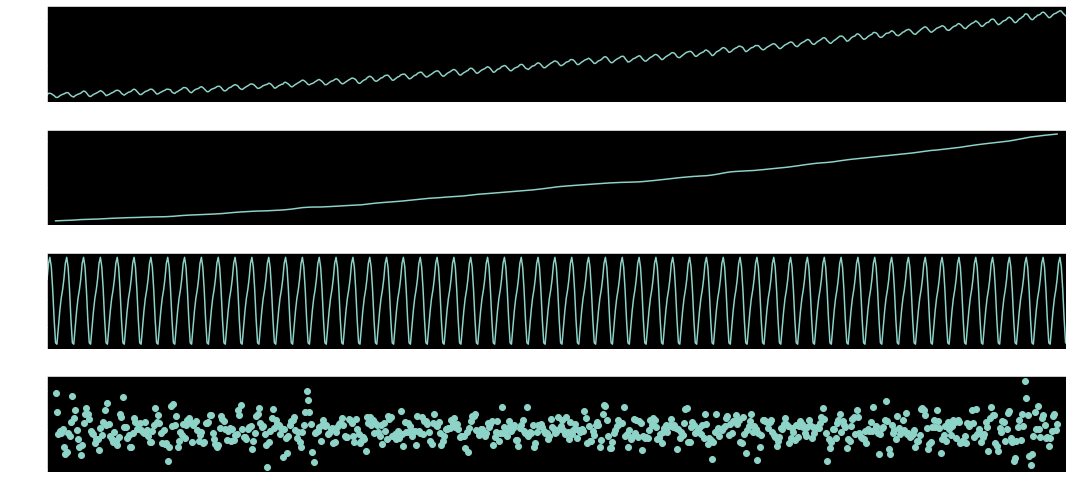

In [166]:
co2_decompObj = seasonal.seasonal_decompose( co2_df )
rcParams['figure.figsize'] = 15,7; co2_decompObj.plot(); plt.show(); 

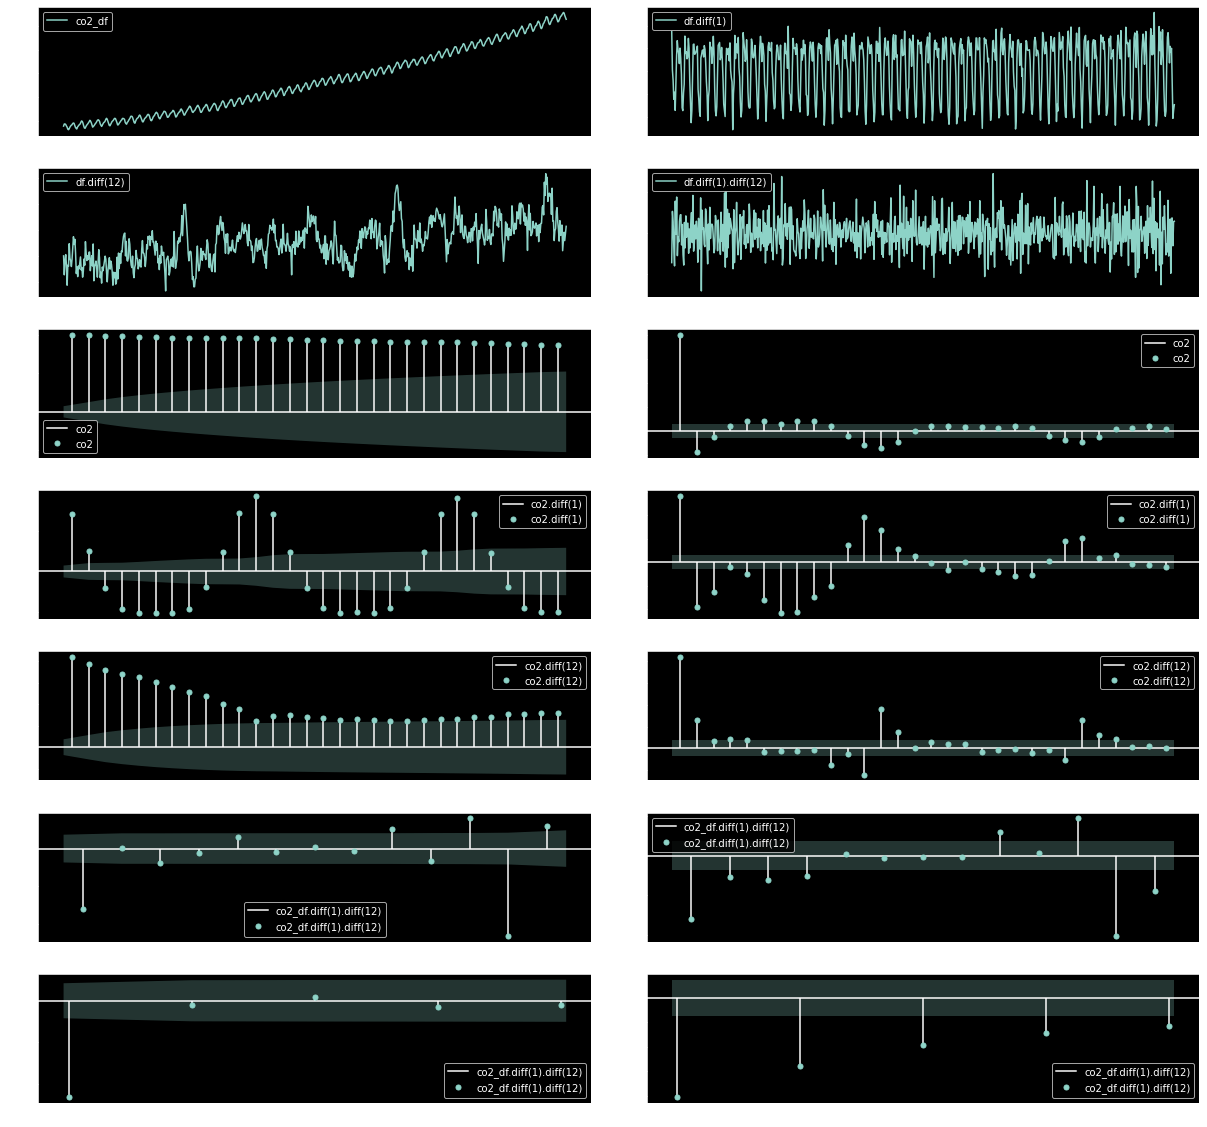

In [208]:
co2_1 = co2_df.diff(1).dropna()
co2_12 = co2_df.diff(12).dropna()
co2_1_12 = co2_df.diff(1).diff(12).dropna()


fg = plt.figure()
gs = GridSpec(7,2, figure= fg, top= 2.3, right= 1.2, hspace= 0.25, wspace= 0.1 )

ax1a = fg.add_subplot( gs[0,0] ); ax1b = fg.add_subplot( gs[0,1] )
ax2a = fg.add_subplot( gs[1,0] ); ax2b = fg.add_subplot( gs[1,1] )
ax3a = fg.add_subplot( gs[2,0] ); ax3b = fg.add_subplot( gs[2,1] )
ax4a = fg.add_subplot( gs[3,0] ); ax4b = fg.add_subplot( gs[3,1] )
ax5a = fg.add_subplot( gs[4,0] ); ax5b = fg.add_subplot( gs[4,1] )
ax6a = fg.add_subplot( gs[5,0] ); ax6b = fg.add_subplot( gs[5,1] )
ax7a = fg.add_subplot( gs[6,0] ); ax7b = fg.add_subplot( gs[6,1] )


ax1a.plot( co2_df, label= 'co2_df' );
ax1b.plot( co2_1, label= 'df.diff(1)' )

ax2a.plot( co2_12, label= 'df.diff(12)' );
ax2b.plot( co2_1_12, label= 'df.diff(1).diff(12)' )

plot_acf( co2_df, ax= ax3a, zero= False, lags= 30, label = 'co2' )
plot_pacf( co2_df, ax= ax3b, zero= False, lags= 30, label = 'co2' )

plot_acf(  co2_1,  ax= ax4a, zero= False, lags= 30, label = 'co2.diff(1)' )
plot_pacf( co2_1, ax= ax4b, zero= False, lags= 30, label = 'co2.diff(1)' )

plot_acf(  co2_12, ax= ax5a, zero= False, lags= 30, label = 'co2.diff(12)' )
plot_pacf( co2_12, ax= ax5b, zero= False, lags= 30, label = 'co2.diff(12)' )

plot_acf(  co2_1_12, ax= ax6a, zero= False, lags= 13, label = 'co2_df.diff(1).diff(12)' )
plot_pacf( co2_1_12, ax= ax6b, zero= False, lags= 13, label = 'co2_df.diff(1).diff(12)' )

seasonal_lag_extent = 6
lag_ls = [ 12*x for x in range(1,seasonal_lag_extent) ]

plot_acf(  co2_1_12, ax= ax7a, zero= False, lags= lag_ls, label = 'co2_df.diff(1).diff(12)' )
plot_pacf( co2_1_12, ax= ax7b, zero= False, lags= lag_ls, label = 'co2_df.diff(1).diff(12)' )

ax_ls = [ ax1a, ax2a, ax3a, ax4a, ax5a, ax6a, ax7a,   ax1b, ax2b, ax3b, ax4b, ax5b, ax6b, ax7b ]

[ ax.legend() for ax in ax_ls ]
plt.show()

Based on the `ACF` & `PACF`, we will fit a `SARIMA(1, 1, 1)(0, 1, 1)12` model

In [210]:
sarimaModel_fit = SARIMAX( endog= co2_df, order= (1,1,1), seasonal_order= (0,1,1,12), trend= 'c' ).fit()

In [212]:
print( sarimaModel_fit.summary() )

                                     SARIMAX Results                                      
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -179.718
Date:                            Mon, 21 Jun 2021   AIC                            369.437
Time:                                    23:18:11   BIC                            392.291
Sample:                                03-01-1958   HQIC                           378.263
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      2.805      0.005       0.001       0.003
ar.L1          0.2413      0.079   

##### model Diagnostics plots

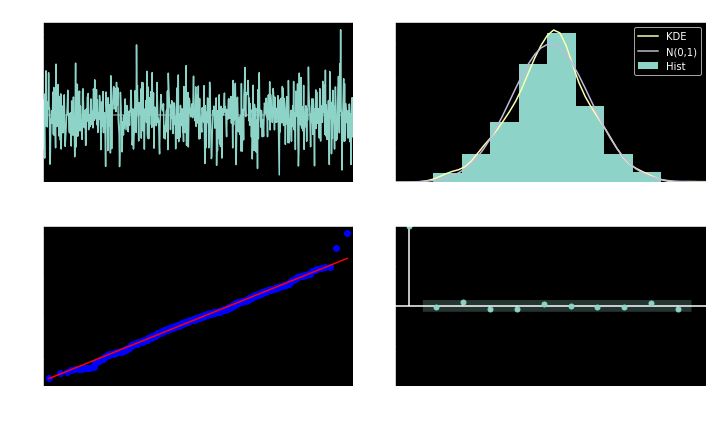

In [213]:
sarimaModel_fit.plot_diagnostics( figsize= (10,6) )
plt.tight_layout(); plt.show()

#### SARIMA forecast

In [220]:
forecast_Sarima_obj = sarimaModel_fit.get_forecast( steps= 136 )

yhat_Sarima_ser = forecast_Sarima_obj.predicted_mean
CI_Sarima_df = forecast_Sarima_obj.conf_int()

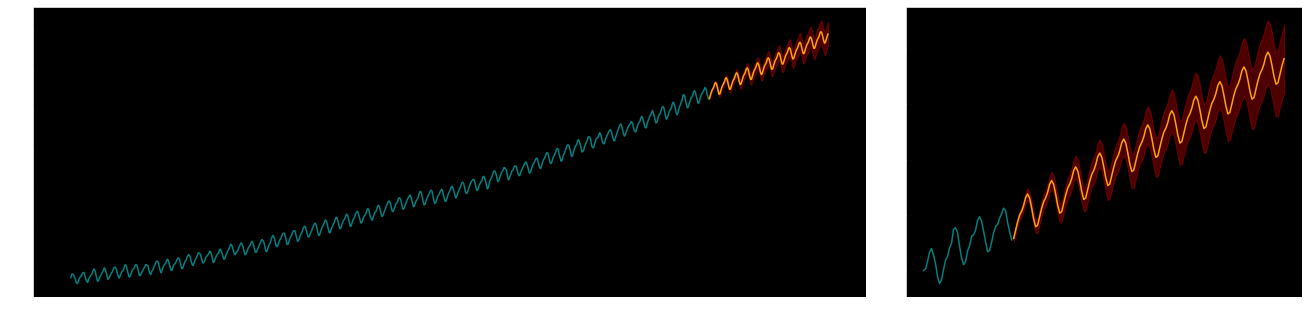

In [231]:
fg = plt.figure()
gs = GridSpec( 1,3, figure= fg, top= 0.7, right= 1.3, hspace= 0.25, wspace= 0.1 )

ax1a = fg.add_subplot( gs[0,:2] ); ax1b = fg.add_subplot( gs[0,2] )

ax1a.plot( co2_df, color= 'teal', label= 'y' )
ax1a.plot( yhat_Sarima_ser, color= 'orange', label= 'yhat_Sarima' )
ax1a.fill_between( x= yhat_Sarima_ser.index, y1= CI_Sarima_df.iloc[:,0].values, y2= CI_Sarima_df.iloc[:,1].values,
                   alpha= 0.3, color= 'red', label= 'CI 95%' )

ax1b.plot( co2_df['2015':], color= 'teal', label= 'y' )
ax1b.plot( yhat_Sarima_ser, color= 'orange', label= 'yhat_Sarima' )
ax1b.fill_between( x= yhat_Sarima_ser.index, y1= CI_Sarima_df.iloc[:,0].values, y2= CI_Sarima_df.iloc[:,1].values,
                   alpha= 0.3, color= 'red', label= 'CI 95%' )

plt.show()

### Libraries

In [3]:
# %reset
# import utility_madhur



#   &thinsp;   &nbsp;   &ensp;   &emsp;

#  import warnings; warnings.filterwarnings( action= 'ignore' )

# # to check whether a string is a python keyword
# import keyword
# keyword.iskeyword('str')

from IPython.core.display import display, HTML
display(  HTML( '<style>.container { width:100% !important; }</style>' )  )

import warnings
get_ipython().run_line_magic('config', 'Completer.use_jedi = False')
import os, random, time

import pandas as pd
# import pandas_datareader as pdr
import numpy as np,  seaborn as sns
from numpy import savetxt
from numpy import genfromtxt
import sklearn
import missingno as msno
import h5py, math, scipy, statsmodels
# import xlrd
import ipywidgets as widgets

import datetime, dateutil
from datetime import timedelta


# import fuzzywuzzy
# from fuzzywuzzy import fuzz, process
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import *
from matplotlib.gridspec import GridSpec
from pylab import rcParams

# plt.style.use('Solarize_Light2')
plt.style.use('dark_background')

from statsmodels.tsa.stattools import acf, pacf, grangercausalitytests, adfuller
from statsmodels.tsa import seasonal
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa import arima_model, arima_process, arima
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from arch import arch_model
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

import pmdarima as pm
import joblib

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# import yfinance as yf

get_ipython().run_line_magic('matplotlib', 'inline')

np.random.seed(1) # set a seed so that the results are consistent

## Set Jupyter notebook display options for pandas

pd.set_option('display.max_columns', None)
# pd.options.display.max_columns = 8
# pd.set_option('display.max_rows', None)
pd.options.display.max_rows = 5

# <h3><p style= 'text-align:center;'>Img title</p></h3>
# <img src= 'images/split-apply-combine.png' style= 'width:917px;height:437px;'>

# m, wd, ht = 2, 990, 576; ( wd/m, ht/m  )


In [2]:
import re

def clean_text(str_var):    

    '''
    clean the text, useful for column header
    Arguments:
    str_var -- a string variable of any size

    Return:
    str_modf -- a cleaned string variable
    
    '''
    
    # lower case and revome begin & end space
    str_modf = str_var.lower().strip()    
    # replace all non word chars ( everything except letters and nos )
    str_modf = re.sub( pattern= r'[^\w\s]', repl= '_', string= str_modf )    
    # replace all runs of whitespace with '_'
    str_modf = re.sub( pattern= r'\s+', repl= '_', string= str_modf )    
    # repalce > 1 consecutive '_'
    str_modf = re.sub( pattern= r'[__]+', repl= '_', string= str_modf )   
    
    # remove begining and trailing _ : '__any_word____' --> 'any_word'
    def _remove_begin_end_(str_var):
        while True:
            if str_var[-1] == '_':
                str_var = str_modf[:len(str_modf)-1]
            else:                
                break                
        while True:
            if str_var[0] == '_':                            
                str_var = str_modf[1:len(str_modf)]
            else:                
                break                
        return(str_var)
    
    str_modf = _remove_begin_end_(str_modf)        
    
    return(str_modf)    

clean_colm_name = lambda df: [ clean_text(e_cNm) for e_cNm in df.columns ]

def set_Xticks_for_axes( ax_ls, minor_major = (10,50) ):
    '''
    sets the x axis' major & minor ticks distance
    ax = the axis obj, could be single ax obj, a list of axis objs, np array of axis objs
    minor_major = tuple for major and minor distance for x axis    
    '''
    from matplotlib.ticker import ( MultipleLocator, AutoMinorLocator )

    for e_ax in np.array(ax_ls).flatten():      #<-- making all list or single ax obj into np.array & then flattening it
        e_ax.xaxis.set_minor_locator( MultipleLocator( minor_major[0] ) )
        e_ax.xaxis.set_major_locator( MultipleLocator( minor_major[1] ) )
        
def set_ticks_for_axes( ax_ls, x_y= 'x', minor_major= (10,50) ):
    '''
    sets the x axis' major & minor ticks distance
    x_y = the x or y axis
    ax = the axis obj, could be single ax obj, a list of axis objs, np array of axis objs
    minor_major = tuple for major and minor distance for x axis    
    '''
    from matplotlib.ticker import ( MultipleLocator, AutoMinorLocator )
    
    if x_y == 'x' or x_y != 'y':
        for e_ax in np.array(ax_ls).flatten():      #<-- making all list or single ax obj into np.array & then flattening it
            e_ax.xaxis.set_minor_locator( MultipleLocator( minor_major[0] ) )
            e_ax.xaxis.set_major_locator( MultipleLocator( minor_major[1] ) )
    elif x_y == 'y':
        for e_ax in np.array(ax_ls).flatten():      #<-- making all list or single ax obj into np.array & then flattening it
            e_ax.yaxis.set_minor_locator( MultipleLocator( minor_major[0] ) )
            e_ax.yaxis.set_major_locator( MultipleLocator( minor_major[1] ) )
            
def adfuller_test( ser ):
    adfuller_tests_result = adfuller( ser )
    print( '\nADF Statistic (tValue): {var1:5.2f}    |    pValue: {var2:4.2f}'\
           .format( var1=adfuller_tests_result[0], var2= adfuller_tests_result[1] )  )
    if ( adfuller_tests_result[1] >= 0.05 ): print( 'The TimeSeries is NOT Stationary but a Random Walk' )
    else: print( 'The TimeSeries is Stationary not a Random Walk' )
    return(  [ np.round(adfuller_tests_result[0],3), np.round(adfuller_tests_result[1],3) ] )

def adfuller_test_str( ser ):
    adfuller_tests_result = adfuller( ser )
    
    to_print = 'ADF Statistic (tValue): {var1:5.2f}    |    pValue: {var2:4.2f}'\
               .format( var1=adfuller_tests_result[0], var2= adfuller_tests_result[1] )

    if ( adfuller_tests_result[1] >= 0.05 ):   to_print += '   |   The TimeSeries is NOT Stationary but a Random Walk'
    else:                                      to_print += '   |   The TimeSeries is Stationary not a Random Walk'
    
    return( to_print )

from IPython.display import display_html

def display_side_by_side(*args):
    '''
    func to display pandas dfs side by side
    input: dfs
    '''
    html_str = ''
    for df in args:
        html_str += df.to_html( )
        html_str += pd.DataFrame( [' ']*len(df), columns= [' '] ).to_html( index= False )  
        html_str += pd.DataFrame( [' ']*len(df), columns= [' '] ).to_html( index= False )   
        html_str += pd.DataFrame( [' ']*len(df), columns= [' '] ).to_html( index= False )        
    display_html(  html_str.replace( "table", "table style= 'display:inline'" ),
                   raw=True  )
    
def display_side_by_side_head(*args):
    '''
    func to display pandas dfs side by side
    input: dfs
    '''
    html_str = ''
    for df in args:
        html_str += df.head(5).to_html( )
        html_str += pd.DataFrame( [' ']*5, columns= [' '] ).to_html( index= False ) 
        html_str += pd.DataFrame( [' ']*5, columns= [' '] ).to_html( index= False )    
        html_str += pd.DataFrame( [' ']*5, columns= [' '] ).to_html( index= False )        
    display_html(  html_str.replace( "table", "table style= 'display:inline'" ),
                   raw=True  )